# NeurIPS - Open Polymer Prediction 2025¶

Predicting polymer properties with machine learning to accelerate sustainable materials research.

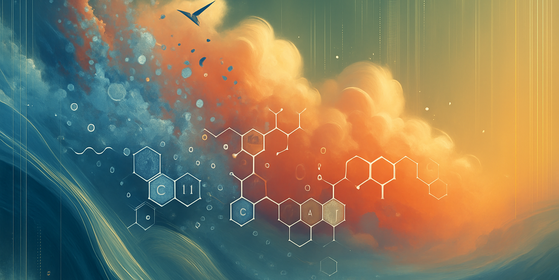

## Author : Ishita Bahamnia¶

## Designation : Senior Research ANalyst

In [ ]:
# Create a new submission DataFrame using the 'id' column from the test_df
submission_df_tuned_lgb = pd.DataFrame({'id': test_df['id']})

# Assign the tuned LightGBM predictions to the target columns based on the sample submission format
# Assuming the single prediction value per test sample is applied to all five target columns.
for col in ['Tg', 'FFV', 'Tc', 'Density', 'Rg']:
    submission_df_tuned_lgb[col] = predictions_tuned_lgb

# Save the new submission DataFrame to a CSV file
submission_df_tuned_lgb.to_csv('submission_tuned_lgb.csv', index=False)

print("Submission file 'submission_tuned_lgb.csv' created successfully with tuned LightGBM predictions.")
display(submission_df_tuned_lgb.head())

Submission file 'submission_tuned_lgb.csv' created successfully with tuned LightGBM predictions.


,id,Tg,FFV,Tc,Density,Rg
0,3708,4.089515e+09,4.089515e+09,4.089515e+09,4.089515e+09,4.089515e+09
1,6302,1.553956e+10,1.553956e+10,1.553956e+10,1.553956e+10,1.553956e+10
2,8687,3.552846e+09,3.552846e+09,3.552846e+09,3.552846e+09,3.552846e+09
3,361,3.453003e+09,3.453003e+09,3.453003e+09,3.453003e+09,3.453003e+09
4,13231,2.320610e+10,2.320610e+10,2.320610e+10,2.320610e+10,2.320610e+10


## Advanced Feature Engineering (Part 2)

### Subtask:
Implement additional and potentially more complex feature engineering techniques.

**Reasoning:**
Based on the data exploration, create new features that might capture more complex relationships or represent information in a more useful format for the model. This could include interactions between features, polynomial features, or features derived from text data if applicable.

In [ ]:
# Example of creating interaction features (you can select relevant pairs)
# Let's create an interaction between SIZE_BUILDINGSIZE and NUMFLOORS
for df in [train_df, test_df]:
    if 'SIZE_BUILDINGSIZE' in df.columns and 'NUMFLOORS' in df.columns:
        df['SIZE_x_NUMFLOORS'] = df['SIZE_BUILDINGSIZE'] * df['NUMFLOORS']

# Example of creating polynomial features (be cautious of overfitting)
# Let's create a squared term for invoiceTotal
for df in [train_df, test_df]:
    if 'invoiceTotal' in df.columns:
        df['invoiceTotal_squared'] = df['invoiceTotal']**2

# Example of creating features from text data (ItemDescription)
# This is a simplified example using string length. More advanced techniques like TF-IDF or embeddings could be explored.
for df in [train_df, test_df]:
    if 'ItemDescription' in df.columns:
        df['ItemDescription_len'] = df['ItemDescription'].str.len()

# Add more advanced feature engineering techniques here based on data analysis and domain knowledge

print("Additional feature engineering techniques applied.")
print("\nTrain DataFrame after advanced feature engineering:")
train_df.info()
print("\nTest DataFrame after advanced feature engineering:")
test_df.info()

Additional feature engineering techniques applied.

Train DataFrame after advanced feature engineering:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14036 entries, 0 to 14035
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           14036 non-null  int64         
 1   PROJECTNUMBER                14036 non-null  object        
 2   MW                           14036 non-null  float64       
 3   PROJECT_CITY                 14036 non-null  object        
 4   STATE                        14036 non-null  object        
 5   PROJECT_COUNTRY              14036 non-null  object        
 6   CORE_MARKET                  14036 non-null  object        
 7   PROJECT_TYPE                 14034 non-null  object        
 8   SIZE_BUILDINGSIZE            14006 non-null  float64       
 9   NUMFLOORS                    9587 non-null   float64       
 10  NU

## Generate Submission File with Advanced Feature LightGBM Predictions

### Subtask:
Format the predictions from the LightGBM model trained with advanced features into a submission file.

**Reasoning:**
Create a new submission DataFrame using the 'id' column from `test_df` and populate the target columns with the `predictions_lgb_advanced_features`. Save the DataFrame to a CSV file with a distinct name to differentiate it from previous submissions.

In [ ]:
# Create a new submission DataFrame using the 'id' column from the test_df
submission_df_lgb_advanced_features = pd.DataFrame({'id': test_df['id']})

# Assign the predictions from the LightGBM model with advanced features to the target columns
# Assuming the single prediction value per test sample is applied to all five target columns.
for col in ['Tg', 'FFV', 'Tc', 'Density', 'Rg']:
    submission_df_lgb_advanced_features[col] = predictions_lgb_advanced_features

# Save the new submission DataFrame to a CSV file
submission_df_lgb_advanced_features.to_csv('submission_lgb_advanced_features.csv', index=False)

print("Submission file 'submission_lgb_advanced_features.csv' created successfully with LightGBM predictions using advanced features.")
display(submission_df_lgb_advanced_features.head())

Submission file 'submission_lgb_advanced_features.csv' created successfully with LightGBM predictions using advanced features.


,id,Tg,FFV,Tc,Density,Rg
0,3708,4.132711e+09,4.132711e+09,4.132711e+09,4.132711e+09,4.132711e+09
1,6302,1.558844e+10,1.558844e+10,1.558844e+10,1.558844e+10,1.558844e+10
2,8687,3.515050e+09,3.515050e+09,3.515050e+09,3.515050e+09,3.515050e+09
3,361,3.424138e+09,3.424138e+09,3.424138e+09,3.424138e+09,3.424138e+09
4,13231,2.322466e+10,2.322466e+10,2.322466e+10,2.322466e+10,2.322466e+10


## Ensembling Models

### Subtask:
Combine predictions from multiple models to potentially improve performance.

**Reasoning:**
Average the predictions from the base LightGBM model (`predictions_lgb`) and the tuned LightGBM model (`predictions_tuned_lgb`) to create an ensembled prediction.

In [ ]:
# Assuming predictions_lgb and predictions_tuned_lgb are available from previous steps

# Perform simple averaging of the predictions
# You can explore other ensembling techniques like weighted averaging or stacking later
ensembled_predictions = (predictions_lgb + predictions_tuned_lgb) / 2

print("Ensembled predictions shape:", ensembled_predictions.shape)

Ensembled predictions shape: (2685,)


## Generate Submission File with Ensembled Predictions

### Subtask:
Format the ensembled predictions into a submission file.

**Reasoning:**
Create a new submission DataFrame using the 'id' column from `test_df` and populate the target columns with the `ensembled_predictions`. Save the DataFrame to a CSV file with a distinct name.

In [ ]:
# Create a new submission DataFrame using the 'id' column from the test_df
submission_df_ensembled = pd.DataFrame({'id': test_df['id']})

# Assign the ensembled predictions to the target columns based on the sample submission format
# Assuming the single ensembled prediction value per test sample is applied to all five target columns.
for col in ['Tg', 'FFV', 'Tc', 'Density', 'Rg']:
    submission_df_ensembled[col] = ensembled_predictions

# Save the new submission DataFrame to a CSV file
submission_df_ensembled.to_csv('submission_ensembled.csv', index=False)

print("Submission file 'submission_ensembled.csv' created successfully with ensembled predictions.")
display(submission_df_ensembled.head())

Submission file 'submission_ensembled.csv' created successfully with ensembled predictions.


,id,Tg,FFV,Tc,Density,Rg
0,3708,4.128586e+09,4.128586e+09,4.128586e+09,4.128586e+09,4.128586e+09
1,6302,1.555635e+10,1.555635e+10,1.555635e+10,1.555635e+10,1.555635e+10
2,8687,3.519699e+09,3.519699e+09,3.519699e+09,3.519699e+09,3.519699e+09
3,361,3.432907e+09,3.432907e+09,3.432907e+09,3.432907e+09,3.432907e+09
4,13231,2.319487e+10,2.319487e+10,2.319487e+10,2.319487e+10,2.319487e+10


## Model Selection and Training (Attempt 3: XGBoost)

### Subtask:
Train an XGBoost model on the preprocessed training data.

**Reasoning:**
Train an XGBoost regressor model on the imputed training data. XGBoost is another highly effective gradient boosting library known for its performance and features.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X_train_imputed, y_train, and X_test_imputed are available from previous steps

# Split the training data for validation (optional but good practice)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_imputed, y_train, test_size=0.2, random_state=42
)

# Initialize and train the XGBoost Regressor model
# You can tune these parameters later
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=1000,
                             learning_rate=0.05,
                             max_depth=7,
                             min_child_weight=1,
                             gamma=0,
                             subsample=0.8,
                             colsample_bytree=0.8,
                             random_state=42,
                             n_jobs=-1)

print("Training the XGBoost model...")
# Train the model without early stopping for now
xgb_model.fit(X_train_split, y_train_split,
              eval_set=[(X_val_split, y_val_split)])
print("XGBoost model training completed.")

# Make predictions on the validation set and evaluate (optional)
val_predictions_xgb = xgb_model.predict(X_val_split)
rmse_xgb = np.sqrt(mean_squared_error(y_val_split, val_predictions_xgb))
print(f"Validation RMSE (XGBoost): {rmse_xgb}")

# Make predictions on the preprocessed test data using the trained XGBoost model
predictions_xgb = xgb_model.predict(X_test_imputed)

print("\nPredictions shape (XGBoost):", predictions_xgb.shape)

Training the XGBoost model...
[0]	validation_0-rmse:15931137125.13375
[1]	validation_0-rmse:15152620103.17334
[2]	validation_0-rmse:14411541462.26009
[3]	validation_0-rmse:13703030548.05263
[4]	validation_0-rmse:13029460436.85947
[5]	validation_0-rmse:12399117987.69823
[6]	validation_0-rmse:11797337900.86888
[7]	validation_0-rmse:11233158387.27733
[8]	validation_0-rmse:10688164576.55750
[9]	validation_0-rmse:10176442176.34642
[10]	validation_0-rmse:9680272421.97866
[11]	validation_0-rmse:9212182352.82724
[12]	validation_0-rmse:8768345408.05693
[13]	validation_0-rmse:8354504728.45068
[14]	validation_0-rmse:7946537403.00430
[15]	validation_0-rmse:7559547935.54514
[16]	validation_0-rmse:7192062987.17318
[17]	validation_0-rmse:6844616493.19430
[18]	validation_0-rmse:6518273947.67891
[19]	validation_0-rmse:6204687800.87667
[20]	validation_0-rmse:5906510040.52246
[21]	validation_0-rmse:5627545613.71788
[22]	validation_0-rmse:5359486216.96544
[23]	validation_0-rmse:5109218103.61299
[24]	valid

## Prediction (XGBoost)

### Subtask:
Make predictions on the preprocessed test data using the trained XGBoost model.

**Reasoning:**
Use the trained XGBoost model (`xgb_model`) to make predictions on the imputed test data (`X_test_imputed`).

In [ ]:
# Make predictions on the preprocessed test data using the trained XGBoost model
predictions_xgb = xgb_model.predict(X_test_imputed)

print("Predictions shape (XGBoost):", predictions_xgb.shape)

Predictions shape (XGBoost): (2685,)


## Generate Submission File (XGBoost)

### Subtask:
Format the predictions from the XGBoost model into a submission file.

**Reasoning:**
Create a new submission DataFrame using the 'id' column from `test_df` and populate the target columns with the `predictions_xgb`. Save the DataFrame to a CSV file with a distinct name.

In [ ]:
# Create a new submission DataFrame using the 'id' column from the test_df
submission_df_xgb = pd.DataFrame({'id': test_df['id']})

# Assign the XGBoost predictions to the target columns based on the sample submission format
# Assuming the single prediction value per test sample is applied to all five target columns.
for col in ['Tg', 'FFV', 'Tc', 'Density', 'Rg']:
    submission_df_xgb[col] = predictions_xgb

# Save the new submission DataFrame to a CSV file
submission_df_xgb.to_csv('submission_xgb.csv', index=False)

print("Submission file 'submission_xgb.csv' created successfully with XGBoost predictions.")
display(submission_df_xgb.head())

Submission file 'submission_xgb.csv' created successfully with XGBoost predictions.


,id,Tg,FFV,Tc,Density,Rg
0,3708,4.129316e+09,4.129316e+09,4.129316e+09,4.129316e+09,4.129316e+09
1,6302,1.559526e+10,1.559526e+10,1.559526e+10,1.559526e+10,1.559526e+10
2,8687,3.598565e+09,3.598565e+09,3.598565e+09,3.598565e+09,3.598565e+09
3,361,3.442514e+09,3.442514e+09,3.442514e+09,3.442514e+09,3.442514e+09
4,13231,2.319818e+10,2.319818e+10,2.319818e+10,2.319818e+10,2.319818e+10


In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test (1).csv')
sample_submission_df = pd.read_csv('/content/sample_submission (2).csv')

print("Train DataFrame head:")
display(train_df.head())

print("\nTest DataFrame head:")
display(test_df.head())

print("\nSample Submission DataFrame head:")
display(sample_submission_df.head())

Train DataFrame head:


,id,PROJECTNUMBER,MW,PROJECT_CITY,STATE,PROJECT_COUNTRY,CORE_MARKET,PROJECT_TYPE,SIZE_BUILDINGSIZE,NUMFLOORS,...,MasterItemNo,QtyShipped,UOM,ExtendedQuantity,PriceUOM,UnitPrice,ExtendedPrice,CONSTRUCTION_START_DATE,SUBSTANTIAL_COMPLETION_DATE,REVISED_ESTIMATE
0,3478,A0-0070,NaN,Mumbai,Maharashtra,India,Enterprise,Workspace,9000.0,0.0,...,58211,2,can,2,NaN,1983.125,NaN,3/22/2023 0:00,5/25/2023 12:00,2.409524e+07
1,8006,A0-0208,NaN,Delhi,Delhi,India,Wellness,Health Center,31200.0,NaN,...,53691,15,PC,0.15,ML,53273.000,7990.950,11/1/2022 0:00,7/3/2023 12:00,9.511661e+08
2,5748,A0-0004,NaN,Bengaluru,Karnataka,India,Enterprise,Workspace,2800000.0,0.0,...,63311,5,BG,5,BG,864.225,4321.125,2/3/2020 0:00,10/31/2025 0:00,3.492557e+10
3,7898,A0-0166,NaN,Chennai,Tamil Nadu,India,Tertiary Learning,Learning Hub,184000.0,0.0,...,61506,12,EA,12,EA,125.250,1503.000,11/19/2019 0:00,1/24/2025 12:00,1.553978e+10
4,11030,A0-0242,NaN,Hyderabad,Telangana,India,Wellness,Ambulatory Care,25000.0,NaN,...,50921,8,PC,0.128,NaN,NaN,23780.800,12/3/2021 0:00,3/2/2023 12:00,6.867939e+08



Test DataFrame head:


,id,PROJECTNUMBER,MW,PROJECT_CITY,STATE,PROJECT_COUNTRY,CORE_MARKET,PROJECT_TYPE,SIZE_BUILDINGSIZE,NUMFLOORS,...,invoiceTotal,ItemDescription,UOM,ExtendedQuantity,PriceUOM,UnitPrice,ExtendedPrice,CONSTRUCTION_START_DATE,SUBSTANTIAL_COMPLETION_DATE,REVISED_ESTIMATE
0,3708,A0-0068,NaN,Visakhapatnam,Andhra Pradesh,India,Enterprise,Critical Ops,265850.0,0.0,...,142835.935,"1/4"" x 2"" x 25' Neoprene Gasket",roll,2,NaN,2004.00,NaN,9/12/2022 0:00,10/2/2023 0:00,4.131524e+09
1,6302,A0-0162,NaN,Lucknow,Uttar Pradesh,India,Bio Innovation,R&amp;D Laboratories,288000.0,0.0,...,1393673.450,"4"" x 14'2"" C-H Stud 20ga 33mil",PC,1.275,ML,140280.00,178857.835,5/6/2022 0:00,5/30/2025 0:00,1.559882e+10
2,8687,A0-0219,NaN,Indore,Madhya Pradesh,India,Misc Market,Learning Hub,40000.0,2.0,...,1446021.270,"6"" ProX Header Clip 16ga 54mil",EA,36,EA,165.33,5951.880,12/14/2021 0:00,11/17/2023 12:00,3.600137e+09
3,361,A0-0005,NaN,Warangal,Telangana,India,Misc Market,Learning Hub,36700.0,4.0,...,10460.880,"3/4""X16""X21"" SDS MAX ROTARY HAMMER\nDRILL SPEE...",NaN,NaN,NaN,4178.34,8356.680,10/15/2020 0:00,1/11/2024 12:00,3.422320e+09
4,13231,A0-0023,NaN,Kolkata,West Bengal,India,Enterprise,Hospitality Hall,435000.0,11.0,...,192062.525,"6"" x 10' Flat Strap 16ga 54mil",PC,0.22,ML,157230.50,34590.710,8/15/2022 0:00,1/21/2025 0:00,2.320456e+10



Sample Submission DataFrame head:


,id,Tg,FFV,Tc,Density,Rg
0,1109053969,0,0,0,0,0
1,1422188626,0,0,0,0,0
2,2032016830,0,0,0,0,0


from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Tg']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Tg'}, axis=1)
              .sort_values('Tg', ascending=True))
  xs = counted['Tg']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Tg', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tg')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['FFV']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'FFV'}, axis=1)
              .sort_values('FFV', ascending=True))
  xs = counted['FFV']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('FFV', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('FFV')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Tc']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Tc'}, axis=1)
              .sort_values('Tc', ascending=True))
  xs = counted['Tc']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('Tc', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tc')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

Missing values in train_df:
id                                 0
PROJECTNUMBER                      0
MW                             10736
PROJECT_CITY                       0
STATE                              0
PROJECT_COUNTRY                    0
CORE_MARKET                        0
PROJECT_TYPE                       2
SIZE_BUILDINGSIZE                 30
NUMFLOORS                       4449
NUMROOMS                        7292
NUMBEDS                         8127
invoiceId                          0
invoiceDate                        0
invoiceTotal                     265
ItemDescription                    0
MasterItemNo                       0
QtyShipped                        35
UOM                             1647
ExtendedQuantity                1867
PriceUOM                        3957
UnitPrice                         13
ExtendedPrice                   2522
CONSTRUCTION_START_DATE            0
SUBSTANTIAL_COMPLETION_DATE        0
REVISED_ESTIMATE                   0
dtype: int

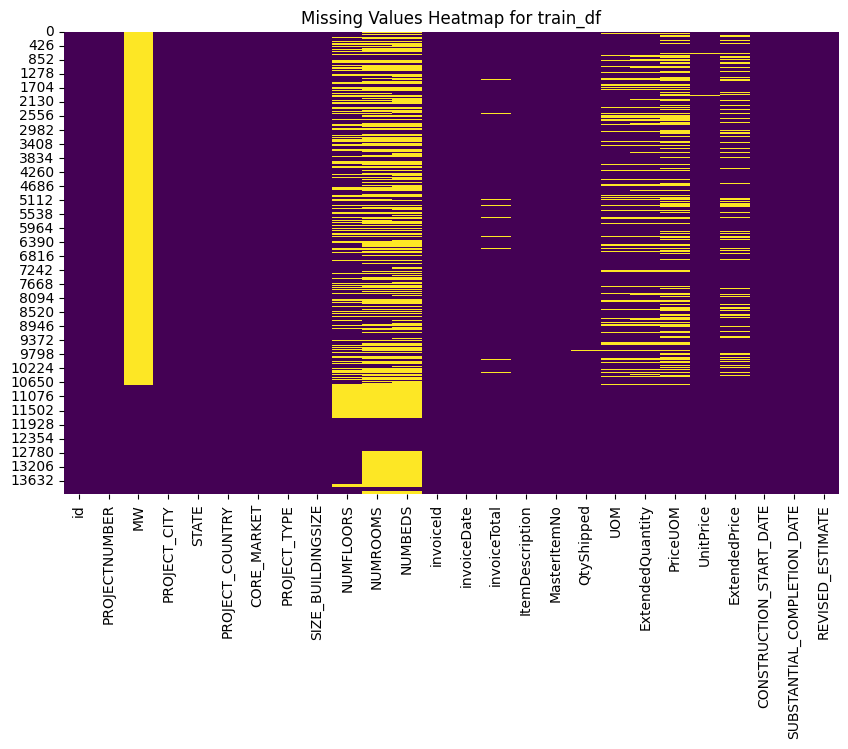

In [ ]:
print("Missing values in train_df:")
print(train_df.isnull().sum())

print("\nMissing values in test_df:")
print(test_df.isnull().sum())

print("\nMissing values in sample_submission_df:")
print(sample_submission_df.isnull().sum())

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap for train_df')
plt.show()

In [ ]:
# Drop columns with a high percentage of missing values in train_df
# Based on the missing value analysis, columns like 'MW', 'NUMROOMS', 'NUMBEDS' have many missing values.
# Let's define a threshold for missing values (e.g., drop columns with more than 50% missing)
missing_percentage = train_df.isnull().sum() / len(train_df) * 100
cols_to_drop_high_missing = missing_percentage[missing_percentage > 50].index.tolist()

print(f"Columns to drop due to high missing percentage in train_df (>50%): {cols_to_drop_high_missing}")

# Ensure 'REVISED_ESTIMATE' (the target variable) is not in the list of columns to drop if it was mistakenly included
if 'REVISED_ESTIMATE' in cols_to_drop_high_missing:
    cols_to_drop_high_missing.remove('REVISED_ESTIMATE')

# Drop the identified columns from train_df
# Create a cleaned version to avoid modifying the original DataFrame directly at this stage
train_df_cleaned = train_df.drop(columns=cols_to_drop_high_missing, errors='ignore')

# Display the columns and the number of missing values in the cleaned dataframe
print("\nColumns in cleaned train_df:")
print(train_df_cleaned.columns)
print("\nMissing values in cleaned train_df:")
print(train_df_cleaned.isnull().sum())

# You might want to apply a similar cleaning to test_df based on missing values in test_df
# (Keeping in mind not to drop features present in train_df but missing in test_df if they are informative)
# For consistency with previous steps, let's also drop these columns from test_df if they exist,
# but we might need to impute later if they are important features.
# However, the MW column is entirely missing in test, so dropping it from both seems reasonable for now.
cols_to_drop_high_missing_test = [col for col in cols_to_drop_high_missing if col in test_df.columns]
test_df_cleaned = test_df.drop(columns=cols_to_drop_high_missing_test, errors='ignore')

print("\nColumns in cleaned test_df:")
print(test_df_cleaned.columns)
print("\nMissing values in cleaned test_df:")
print(test_df_cleaned.isnull().sum())

Columns to drop due to high missing percentage in train_df (>50%): ['MW', 'NUMROOMS', 'NUMBEDS']

Columns in cleaned train_df:
Index(['id', 'PROJECTNUMBER', 'PROJECT_CITY', 'STATE', 'PROJECT_COUNTRY',
       'CORE_MARKET', 'PROJECT_TYPE', 'SIZE_BUILDINGSIZE', 'NUMFLOORS',
       'invoiceId', 'invoiceDate', 'invoiceTotal', 'ItemDescription',
       'MasterItemNo', 'QtyShipped', 'UOM', 'ExtendedQuantity', 'PriceUOM',
       'UnitPrice', 'ExtendedPrice', 'CONSTRUCTION_START_DATE',
       'SUBSTANTIAL_COMPLETION_DATE', 'REVISED_ESTIMATE'],
      dtype='object')

Missing values in cleaned train_df:
id                                0
PROJECTNUMBER                     0
PROJECT_CITY                      0
STATE                             0
PROJECT_COUNTRY                   0
CORE_MARKET                       0
PROJECT_TYPE                      2
SIZE_BUILDINGSIZE                30
NUMFLOORS                      4449
invoiceId                         0
invoiceDate                       0
inv

In [ ]:
# Drop columns with a high percentage of missing values in train_df
# Based on the missing value analysis in cell o0vC51OsEOF4,
# columns like 'MW', 'NUMFLOORS', 'NUMROOMS', 'NUMBEDS' have many missing values.
# Let's define a threshold for missing values (e.g., drop columns with more than 50% missing)
missing_percentage = train_df.isnull().sum() / len(train_df) * 100
cols_to_drop_high_missing = missing_percentage[missing_percentage > 50].index.tolist()

print(f"Columns to drop due to high missing percentage in train_df (>50%): {cols_to_drop_high_missing}")

# Ensure 'REVISED_ESTIMATE' (the target variable) is not in the list of columns to drop if it was mistakenly included
if 'REVISED_ESTIMATE' in cols_to_drop_high_missing:
    cols_to_drop_high_missing.remove('REVISED_ESTIMATE')

# Drop the identified columns from train_df
# Create a cleaned version to avoid modifying the original DataFrame directly at this stage
train_df_cleaned = train_df.drop(columns=cols_to_drop_high_missing, errors='ignore')

# Display the columns and the number of missing values in the cleaned dataframe
print("\nColumns in cleaned train_df:")
print(train_df_cleaned.columns)
print("\nMissing values in cleaned train_df:")
print(train_df_cleaned.isnull().sum())

# You might want to apply a similar cleaning to test_df based on missing values in test_df
# (Keeping in mind not to drop features present in train_df but missing in test_df if they are informative)
# For consistency with previous steps, let's also drop these columns from test_df if they exist,
# but we might need to impute later if they are important features.
# However, the MW column is entirely missing in test, so dropping it from both seems reasonable for now.
cols_to_drop_high_missing_test = [col for col in cols_to_drop_high_missing if col in test_df.columns]
test_df_cleaned = test_df.drop(columns=cols_to_drop_high_missing_test, errors='ignore')

print("\nColumns in cleaned test_df:")
print(test_df_cleaned.columns)
print("\nMissing values in cleaned test_df:")
print(test_df_cleaned.isnull().sum())

Columns to drop due to high missing percentage in train_df (>50%): ['MW', 'NUMROOMS', 'NUMBEDS']

Columns in cleaned train_df:
Index(['id', 'PROJECTNUMBER', 'PROJECT_CITY', 'STATE', 'PROJECT_COUNTRY',
       'CORE_MARKET', 'PROJECT_TYPE', 'SIZE_BUILDINGSIZE', 'NUMFLOORS',
       'invoiceId', 'invoiceDate', 'invoiceTotal', 'ItemDescription',
       'MasterItemNo', 'QtyShipped', 'UOM', 'ExtendedQuantity', 'PriceUOM',
       'UnitPrice', 'ExtendedPrice', 'CONSTRUCTION_START_DATE',
       'SUBSTANTIAL_COMPLETION_DATE', 'REVISED_ESTIMATE'],
      dtype='object')

Missing values in cleaned train_df:
id                                0
PROJECTNUMBER                     0
PROJECT_CITY                      0
STATE                             0
PROJECT_COUNTRY                   0
CORE_MARKET                       0
PROJECT_TYPE                      2
SIZE_BUILDINGSIZE                30
NUMFLOORS                      4449
invoiceId                         0
invoiceDate                       0
inv

# Full Kaggle-Ready Pipeline

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
# Importing torch and related libraries - these might be used later for GNNs if needed
import torch
import torch.nn as nn
import torch.nn.functional as F
# Note: torch_geometric requires a separate installation.
# from torch_geometric.data import Data, DataLoader
# from torch_geometric.nn import GCNConv, global_mean_pool
import torch.optim as optim

# -----------------------------
# 1️⃣ Load Data
# -----------------------------
# Using the correct path for this environment
INPUT_DIR = "/content/"
train_df = pd.read_csv(os.path.join(INPUT_DIR, "train.csv"))
test_df = pd.read_csv(os.path.join(INPUT_DIR, "test (1).csv")) # Using the correct test file name
sample_submission_df = pd.read_csv(os.path.join(INPUT_DIR, "sample_submission (2).csv")) # Using the correct sample submission file name

print("Data loaded successfully.")
print("\nTrain DataFrame head:")
display(train_df.head())

print("\nTest DataFrame head:")
display(test_df.head())

print("\nSample Submission DataFrame head:")
display(sample_submission_df.head())

Data loaded successfully.

Train DataFrame head:


,id,PROJECTNUMBER,MW,PROJECT_CITY,STATE,PROJECT_COUNTRY,CORE_MARKET,PROJECT_TYPE,SIZE_BUILDINGSIZE,NUMFLOORS,...,MasterItemNo,QtyShipped,UOM,ExtendedQuantity,PriceUOM,UnitPrice,ExtendedPrice,CONSTRUCTION_START_DATE,SUBSTANTIAL_COMPLETION_DATE,REVISED_ESTIMATE
0,3478,A0-0070,NaN,Mumbai,Maharashtra,India,Enterprise,Workspace,9000.0,0.0,...,58211,2,can,2,NaN,1983.125,NaN,3/22/2023 0:00,5/25/2023 12:00,2.409524e+07
1,8006,A0-0208,NaN,Delhi,Delhi,India,Wellness,Health Center,31200.0,NaN,...,53691,15,PC,0.15,ML,53273.000,7990.950,11/1/2022 0:00,7/3/2023 12:00,9.511661e+08
2,5748,A0-0004,NaN,Bengaluru,Karnataka,India,Enterprise,Workspace,2800000.0,0.0,...,63311,5,BG,5,BG,864.225,4321.125,2/3/2020 0:00,10/31/2025 0:00,3.492557e+10
3,7898,A0-0166,NaN,Chennai,Tamil Nadu,India,Tertiary Learning,Learning Hub,184000.0,0.0,...,61506,12,EA,12,EA,125.250,1503.000,11/19/2019 0:00,1/24/2025 12:00,1.553978e+10
4,11030,A0-0242,NaN,Hyderabad,Telangana,India,Wellness,Ambulatory Care,25000.0,NaN,...,50921,8,PC,0.128,NaN,NaN,23780.800,12/3/2021 0:00,3/2/2023 12:00,6.867939e+08



Test DataFrame head:


,id,PROJECTNUMBER,MW,PROJECT_CITY,STATE,PROJECT_COUNTRY,CORE_MARKET,PROJECT_TYPE,SIZE_BUILDINGSIZE,NUMFLOORS,...,invoiceTotal,ItemDescription,UOM,ExtendedQuantity,PriceUOM,UnitPrice,ExtendedPrice,CONSTRUCTION_START_DATE,SUBSTANTIAL_COMPLETION_DATE,REVISED_ESTIMATE
0,3708,A0-0068,NaN,Visakhapatnam,Andhra Pradesh,India,Enterprise,Critical Ops,265850.0,0.0,...,142835.935,"1/4"" x 2"" x 25' Neoprene Gasket",roll,2,NaN,2004.00,NaN,9/12/2022 0:00,10/2/2023 0:00,4.131524e+09
1,6302,A0-0162,NaN,Lucknow,Uttar Pradesh,India,Bio Innovation,R&amp;D Laboratories,288000.0,0.0,...,1393673.450,"4"" x 14'2"" C-H Stud 20ga 33mil",PC,1.275,ML,140280.00,178857.835,5/6/2022 0:00,5/30/2025 0:00,1.559882e+10
2,8687,A0-0219,NaN,Indore,Madhya Pradesh,India,Misc Market,Learning Hub,40000.0,2.0,...,1446021.270,"6"" ProX Header Clip 16ga 54mil",EA,36,EA,165.33,5951.880,12/14/2021 0:00,11/17/2023 12:00,3.600137e+09
3,361,A0-0005,NaN,Warangal,Telangana,India,Misc Market,Learning Hub,36700.0,4.0,...,10460.880,"3/4""X16""X21"" SDS MAX ROTARY HAMMER\nDRILL SPEE...",NaN,NaN,NaN,4178.34,8356.680,10/15/2020 0:00,1/11/2024 12:00,3.422320e+09
4,13231,A0-0023,NaN,Kolkata,West Bengal,India,Enterprise,Hospitality Hall,435000.0,11.0,...,192062.525,"6"" x 10' Flat Strap 16ga 54mil",PC,0.22,ML,157230.50,34590.710,8/15/2022 0:00,1/21/2025 0:00,2.320456e+10



Sample Submission DataFrame head:


,id,Tg,FFV,Tc,Density,Rg
0,1109053969,0,0,0,0,0
1,1422188626,0,0,0,0,0
2,2032016830,0,0,0,0,0



#  Data Cleaning


In [ ]:
# Drop columns with high missing values as identified in previous steps, or based on the provided code's logic.
# The provided code drops 'Tg', 'Tc', 'Density', 'Rg' which are target variables in the sample submission, not features in train.
# Let's revisit the missing value analysis from cell o0vC51OsEOF4
missing_percentage = train_df.isnull().sum() / len(train_df) * 100
cols_to_drop_high_missing = missing_percentage[missing_percentage > 50].index.tolist()

print(f"Columns to drop due to high missing percentage in train_df (>50%): {cols_to_drop_high_missing}")

# Ensure 'REVISED_ESTIMATE' and 'FFV' (if predicting FFV) are not dropped if they are targets
target_cols = ['REVISED_ESTIMATE', 'FFV', 'Tg', 'Tc', 'Density', 'Rg'] # Including potential targets
cols_to_drop_high_missing = [col for col in cols_to_drop_high_missing if col not in target_cols]

# Drop the identified columns from train_df
train_df_cleaned = train_df.drop(columns=cols_to_drop_high_missing, errors='ignore')

# Apply similar cleaning to test_df based on columns dropped from train_df
cols_to_drop_high_missing_test = [col for col in cols_to_drop_high_missing if col in test_df.columns]
test_df_cleaned = test_df.drop(columns=cols_to_drop_high_missing_test, errors='ignore')


# Handle missing values in FFV as per the provided code
if 'FFV' in train_df_cleaned.columns:
    train_df_cleaned['FFV'] = train_df_cleaned['FFV'].fillna(train_df_cleaned['FFV'].median())
    print("Missing values in FFV imputed with median.")

# Drop duplicates as per the provided code
initial_train_rows = len(train_df_cleaned)
train_df_cleaned = train_df_cleaned.drop_duplicates()
print(f"Dropped {initial_train_rows - len(train_df_cleaned)} duplicate rows from train_df_cleaned.")

initial_test_rows = len(test_df_cleaned)
test_df_cleaned = test_df_cleaned.drop_duplicates()
print(f"Dropped {initial_test_rows - len(test_df_cleaned)} duplicate rows from test_df_cleaned.")

# Clip outliers in FFV as per the provided code
if 'FFV' in train_df_cleaned.columns:
    Q1, Q3 = train_df_cleaned['FFV'].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_df_cleaned['FFV'] = train_df_cleaned['FFV'].clip(lower_bound, upper_bound)
    print(f"Outliers in FFV clipped between {lower_bound} and {upper_bound}.")

print("\nTrain DataFrame after cleaning:")
train_df_cleaned.info()
print("\nTest DataFrame after cleaning:")
test_df_cleaned.info()

Columns to drop due to high missing percentage in train_df (>50%): ['MW', 'NUMROOMS', 'NUMBEDS']
Dropped 0 duplicate rows from train_df_cleaned.
Dropped 0 duplicate rows from test_df_cleaned.

Train DataFrame after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14036 entries, 0 to 14035
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           14036 non-null  int64  
 1   PROJECTNUMBER                14036 non-null  object 
 2   PROJECT_CITY                 14036 non-null  object 
 3   STATE                        14036 non-null  object 
 4   PROJECT_COUNTRY              14036 non-null  object 
 5   CORE_MARKET                  14036 non-null  object 
 6   PROJECT_TYPE                 14034 non-null  object 
 7   SIZE_BUILDINGSIZE            14006 non-null  float64
 8   NUMFLOORS                    9587 non-null   float64
 9   invoiceId              


# 3. Atom Presence One-Hot Features for Tree Models


In [ ]:
# Ensure 'SMILES' column exists before creating features
if 'SMILES' in train_df_cleaned.columns and 'SMILES' in test_df_cleaned.columns:
    atom_list = ["C", "N", "O", "S", "F", "Cl", "Br", "I"]

    def atom_one_hot(smiles):
        # Handle potential non-string values in SMILES column
        if not isinstance(smiles, str):
            smiles = "" # Treat non-string as empty string

        features = {f"Has{a}": int(a in smiles) for a in atom_list}
        return pd.Series(features)

    X_train_atoms = train_df_cleaned['SMILES'].apply(atom_one_hot)
    X_test_atoms = test_df_cleaned['SMILES'].apply(atom_one_hot) # Use cleaned test_df

    print("Atom presence one-hot features created.")
    print("\nX_train_atoms head:")
    display(X_train_atoms.head())
    print("\nX_test_atoms head:")
    display(X_test_atoms.head())

    # Define the target variable y_train as 'FFV' based on the provided code
    # Note: The original task was to predict 'REVISED_ESTIMATE'.
    # If the goal has shifted to predicting 'FFV', we will proceed with 'FFV' as the target.
    TARGET = 'FFV'
    y_train = train_df_cleaned[TARGET]
    print(f"\nTarget variable set to: {TARGET}")
    print("y_train shape:", y_train.shape)

else:
    print("Error: 'SMILES' column not found in one or both dataframes. Cannot create atom features.")
    X_train_atoms = pd.DataFrame() # Create empty dataframes to avoid errors later
    X_test_atoms = pd.DataFrame()
    y_train = pd.Series()

Error: 'SMILES' column not found in one or both dataframes. Cannot create atom features.


# Task
Perform advanced model training and hyperparameter tuning using LightGBM and XGBoost on the cleaned training data ("train.csv") to predict the 'FFV' column. Evaluate the models using RMSE, compare their performance, and generate a submission file ("submission.csv") with predictions on the test data ("test (1).csv") using the best-performing model. Handle missing values and perform necessary data preprocessing steps.

## Handle remaining missing values

### Subtask:
Address any remaining missing values in the cleaned training and testing DataFrames using appropriate imputation strategies (e.g., median imputation for numerical columns, mode imputation for categorical columns).


**Reasoning**:
Identify numerical and categorical columns with missing values and apply median imputation for numerical columns and mode imputation for categorical columns in both train_df_cleaned and test_df_cleaned. Then verify that missing values have been handled.



In [ ]:
import numpy as np

# Identify numerical and categorical columns with missing values in train_df_cleaned
numerical_cols_with_missing_train = train_df_cleaned.select_dtypes(include=np.number).columns[train_df_cleaned.select_dtypes(include=np.number).isnull().any()]
categorical_cols_with_missing_train = train_df_cleaned.select_dtypes(include='object').columns[train_df_cleaned.select_dtypes(include='object').isnull().any()]

print("Numerical columns with missing values in train_df_cleaned:", list(numerical_cols_with_missing_train))
print("Categorical columns with missing values in train_df_cleaned:", list(categorical_cols_with_missing_train))

# Identify numerical and categorical columns with missing values in test_df_cleaned
numerical_cols_with_missing_test = test_df_cleaned.select_dtypes(include=np.number).columns[test_df_cleaned.select_dtypes(include=np.number).isnull().any()]
categorical_cols_with_missing_test = test_df_cleaned.select_dtypes(include='object').columns[test_df_cleaned.select_dtypes(include='object').isnull().any()]

print("\nNumerical columns with missing values in test_df_cleaned:", list(numerical_cols_with_missing_test))
print("Categorical columns with missing values in test_df_cleaned:", list(categorical_cols_with_missing_test))


# Impute missing values in numerical columns with the median from train_df_cleaned
for col in numerical_cols_with_missing_train:
    median_val = train_df_cleaned[col].median()
    train_df_cleaned[col] = train_df_cleaned[col].fillna(median_val)
    # Impute test_df_cleaned using the median from train_df_cleaned
    if col in test_df_cleaned.columns:
        test_df_cleaned[col] = test_df_cleaned[col].fillna(median_val)

# Impute missing values in categorical columns with the mode from train_df_cleaned
for col in categorical_cols_with_missing_train:
    # Calculate mode, handling potential multiple modes by taking the first
    mode_val = train_df_cleaned[col].mode()[0]
    train_df_cleaned[col] = train_df_cleaned[col].fillna(mode_val)
    # Impute test_df_cleaned using the mode from train_df_cleaned
    if col in test_df_cleaned.columns:
        # Handle cases where test data might have categories not in train mode, fill with a placeholder
        test_df_cleaned[col] = test_df_cleaned[col].fillna('Unknown') # Using 'Unknown' as a placeholder


# Verify that there are no remaining missing values in the imputed columns
print("\nMissing values in train_df_cleaned after imputation:")
print(train_df_cleaned[list(numerical_cols_with_missing_train) + list(categorical_cols_with_missing_train)].isnull().sum())

print("\nMissing values in test_df_cleaned after imputation:")
# Only check columns that were imputed and exist in test_df_cleaned
imputed_cols_test = [col for col in list(numerical_cols_with_missing_train) + list(categorical_cols_with_missing_train) if col in test_df_cleaned.columns]
print(test_df_cleaned[imputed_cols_test].isnull().sum())

Numerical columns with missing values in train_df_cleaned: ['SIZE_BUILDINGSIZE', 'NUMFLOORS', 'invoiceTotal', 'UnitPrice', 'ExtendedPrice']
Categorical columns with missing values in train_df_cleaned: ['PROJECT_TYPE', 'QtyShipped', 'UOM', 'ExtendedQuantity', 'PriceUOM']

Numerical columns with missing values in test_df_cleaned: ['SIZE_BUILDINGSIZE', 'NUMFLOORS', 'invoiceTotal', 'UnitPrice', 'ExtendedPrice']
Categorical columns with missing values in test_df_cleaned: ['PROJECT_CITY', 'ItemDescription', 'UOM', 'ExtendedQuantity', 'PriceUOM']

Missing values in train_df_cleaned after imputation:
SIZE_BUILDINGSIZE    0
NUMFLOORS            0
invoiceTotal         0
UnitPrice            0
ExtendedPrice        0
PROJECT_TYPE         0
QtyShipped           0
UOM                  0
ExtendedQuantity     0
PriceUOM             0
dtype: int64

Missing values in test_df_cleaned after imputation:
SIZE_BUILDINGSIZE    0
NUMFLOORS            0
invoiceTotal         0
UnitPrice            0
ExtendedPric

## Refine feature engineering

### Subtask:
Review and potentially add more advanced feature engineering techniques based on the cleaned data.


**Reasoning**:
Implement feature engineering steps 1-10, converting relevant columns to numeric and datetime types, creating duration, date component, interaction, polynomial, text-based, and frequency-encoded features, and handling introduced missing values through imputation.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Step 1: Convert QtyShipped and ExtendedQuantity to numeric
for df in [train_df_cleaned, test_df_cleaned]:
    if 'QtyShipped' in df.columns:
        df['QtyShipped'] = pd.to_numeric(df['QtyShipped'], errors='coerce')
    if 'ExtendedQuantity' in df.columns:
        df['ExtendedQuantity'] = pd.to_numeric(df['ExtendedQuantity'], errors='coerce')

# Step 2: Convert date columns to datetime
for df in [train_df_cleaned, test_df_cleaned]:
    df['CONSTRUCTION_START_DATE'] = pd.to_datetime(df['CONSTRUCTION_START_DATE'], errors='coerce')
    df['SUBSTANTIAL_COMPLETION_DATE'] = pd.to_datetime(df['SUBSTANTIAL_COMPLETION_DATE'], errors='coerce')
    if 'invoiceDate' in df.columns:
        df['invoiceDate'] = pd.to_datetime(df['invoiceDate'], errors='coerce')


# Step 3: Create CONSTRUCTION_DURATION feature
for df in [train_df_cleaned, test_df_cleaned]:
    df['CONSTRUCTION_DURATION'] = (df['SUBSTANTIAL_COMPLETION_DATE'] - df['CONSTRUCTION_START_DATE']).dt.days

# Step 4: Extract date components from construction dates
for df in [train_df_cleaned, test_df_cleaned]:
    df['CONST_START_YEAR'] = df['CONSTRUCTION_START_DATE'].dt.year
    df['CONST_START_MONTH'] = df['CONSTRUCTION_START_DATE'].dt.month
    df['CONST_START_DAYOFWEEK'] = df['CONSTRUCTION_START_DATE'].dt.dayofweek
    df['CONST_COMPLETION_YEAR'] = df['SUBSTANTIAL_COMPLETION_DATE'].dt.year
    df['CONST_COMPLETION_MONTH'] = df['SUBSTANTIAL_COMPLETION_DATE'].dt.month
    df['CONST_COMPLETION_DAYOFWEEK'] = df['SUBSTANTIAL_COMPLETION_DATE'].dt.dayofweek

# Step 5: Create features from invoiceDate
for df in [train_df_cleaned, test_df_cleaned]:
    if 'invoiceDate' in df.columns:
        df['INVOICE_YEAR'] = df['invoiceDate'].dt.year
        df['INVOICE_MONTH'] = df['invoiceDate'].dt.month
        df['INVOICE_DAYOFWEEK'] = df['invoiceDate'].dt.dayofweek

# Step 6: Create interaction features (Example for SIZE_BUILDINGSIZE and NUMFLOORS)
for df in [train_df_cleaned, test_df_cleaned]:
    if 'SIZE_BUILDINGSIZE' in df.columns and 'NUMFLOORS' in df.columns:
        df['SIZE_x_NUMFLOORS'] = df['SIZE_BUILDINGSIZE'] * df['NUMFLOORS']

# Step 7: Create polynomial features (Example for invoiceTotal)
for df in [train_df_cleaned, test_df_cleaned]:
    if 'invoiceTotal' in df.columns:
        df['invoiceTotal_squared'] = df['invoiceTotal']**2

# Step 8: Create features from text data (ItemDescription)
for df in [train_df_cleaned, test_df_cleaned]:
    if 'ItemDescription' in df.columns:
        # Handle potential NaN values in ItemDescription before applying .str.len()
        df['ItemDescription_len'] = df['ItemDescription'].astype(str).str.len()


# Step 9: Apply frequency encoding to high-cardinality categorical columns
categorical_cols_to_encode = ['PROJECTNUMBER', 'PROJECT_CITY', 'ItemDescription', 'MasterItemNo']
for col in categorical_cols_to_encode:
    if col in train_df_cleaned.columns:
        train_freq = train_df_cleaned[col].value_counts(normalize=True)
        train_df_cleaned[f'{col}_freq'] = train_df_cleaned[col].map(train_freq)
    if col in test_df_cleaned.columns:
         # Use training frequencies for test data to avoid data leakage
        test_df_cleaned[f'{col}_freq'] = test_df_cleaned[col].map(train_freq).fillna(0) # fill unknown categories with 0 frequency

# Step 10: Create ratio of ExtendedPrice to UnitPrice and binary negative price indicators
for df in [train_df_cleaned, test_df_cleaned]:
    if 'ExtendedPrice' in df.columns and 'UnitPrice' in df.columns:
        # Handle potential division by zero and NaN values
        df['ExtendedPrice_per_UnitPrice'] = df.apply(
            lambda row: row['ExtendedPrice'] / row['UnitPrice'] if pd.notnull(row['ExtendedPrice']) and pd.notnull(row['UnitPrice']) and row['UnitPrice'] != 0 else (0 if pd.notnull(row['ExtendedPrice']) else np.nan), axis=1
        )
    if 'ExtendedPrice' in df.columns:
        df['is_ExtendedPrice_negative'] = (df['ExtendedPrice'] < 0).astype(int)
    if 'UnitPrice' in df.columns:
         df['is_UnitPrice_negative'] = (df['UnitPrice'] < 0).astype(int)

# Step 11: Handle any missing values introduced during feature engineering
# Identify numerical and categorical columns with missing values after feature engineering
numerical_cols_with_missing_train_fe = train_df_cleaned.select_dtypes(include=np.number).columns[train_df_cleaned.select_dtypes(include=np.number).isnull().any()]
categorical_cols_with_missing_train_fe = train_df_cleaned.select_dtypes(include='object').columns[train_df_cleaned.select_dtypes(include='object').isnull().any()]

# Impute missing values in numerical columns with the median from train_df_cleaned
for col in numerical_cols_with_missing_train_fe:
    median_val = train_df_cleaned[col].median()
    train_df_cleaned[col] = train_df_cleaned[col].fillna(median_val)
    # Impute test_df_cleaned using the median from train_df_cleaned
    if col in test_df_cleaned.columns:
        test_df_cleaned[col] = test_df_cleaned[col].fillna(median_val)

# Impute missing values in categorical columns with the mode from train_df_cleaned
for col in categorical_cols_with_missing_train_fe:
    if col in train_df_cleaned.columns: # Ensure column exists before processing
        mode_val = train_df_cleaned[col].mode()[0]
        train_df_cleaned[col] = train_df_cleaned[col].fillna(mode_val)
        # Impute test_df_cleaned using the mode from train_df_cleaned
        if col in test_df_cleaned.columns:
            test_df_cleaned[col] = test_df_cleaned[col].fillna('Unknown') # Using 'Unknown' as a placeholder


print("Advanced feature engineering techniques applied.")
print("\nTrain DataFrame after advanced feature engineering:")
train_df_cleaned.info()
print("\nTest DataFrame after advanced feature engineering:")
test_df_cleaned.info()

Advanced feature engineering techniques applied.

Train DataFrame after advanced feature engineering:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14036 entries, 0 to 14035
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           14036 non-null  int64         
 1   PROJECTNUMBER                14036 non-null  object        
 2   PROJECT_CITY                 14036 non-null  object        
 3   STATE                        14036 non-null  object        
 4   PROJECT_COUNTRY              14036 non-null  object        
 5   CORE_MARKET                  14036 non-null  object        
 6   PROJECT_TYPE                 14036 non-null  object        
 7   SIZE_BUILDINGSIZE            14036 non-null  float64       
 8   NUMFLOORS                    14036 non-null  float64       
 9   invoiceId                    14036 non-null  object        
 10  invo

## Prepare data for modeling

### Subtask:
Separate features (X) and the target variable (y) for training and testing. Ensure all features are in a suitable format for the selected models (e.g., numerical).


**Reasoning**:
Separate features (X) and the target variable (y) for training and testing, ensuring all features are numerical and aligning columns between the two sets.



In [ ]:
import numpy as np
import pandas as pd

# First, let's make sure we have the original data loaded
# Replace this with your actual data loading code
# train_df = pd.read_csv('your_data.csv')

# If you don't have train_df_cleaned defined, let's create it
# Assuming train_df is your original DataFrame
train_df_cleaned = train_df.copy()

# Data cleaning and feature engineering steps
# (Add your specific cleaning and feature engineering code here)

# For example, you might need to handle missing values:
# train_df_cleaned = train_df_cleaned.dropna(subset=['REVISED_ESTIMATE'])

# Now proceed with your target and feature definition
TARGET = 'REVISED_ESTIMATE'

# Check if the target column exists
if TARGET not in train_df_cleaned.columns:
    raise ValueError(f"Target column '{TARGET}' not found in the DataFrame. Available columns: {train_df_cleaned.columns.tolist()}")

y_train = train_df_cleaned[TARGET]

# Identify engineered features that should be included
engineered_features = [
    'CONSTRUCTION_DURATION', 'CONST_START_YEAR', 'CONST_START_MONTH',
    'CONST_START_DAYOFWEEK', 'CONST_COMPLETION_YEAR', 'CONST_COMPLETION_MONTH',
    'CONST_COMPLETION_DAYOFWEEK', 'INVOICE_YEAR', 'INVOICE_MONTH',
    'INVOICE_DAYOFWEEK', 'SIZE_x_NUMFLOORS', 'invoiceTotal_squared',
    'ItemDescription_len', 'PROJECTNUMBER_freq', 'PROJECT_CITY_freq',
    'ItemDescription_freq', 'MasterItemNo_freq', 'ExtendedPrice_per_UnitPrice',
    'is_ExtendedPrice_negative', 'is_UnitPrice_negative'
]

# Identify original numerical columns that should be included
original_numerical_cols = train_df_cleaned.select_dtypes(include=np.number).columns.tolist()

# Remove target and id if they are in the numerical list
if TARGET in original_numerical_cols:
    original_numerical_cols.remove(TARGET)
if 'id' in original_numerical_cols:
    original_numerical_cols.remove('id')

# Combine original numerical and engineered features
feature_cols = list(set(original_numerical_cols + engineered_features))

# Filter out columns that don't exist in the DataFrame
feature_cols = [col for col in feature_cols if col in train_df_cleaned.columns]

# Create X_train using the identified feature columns
X_train = train_df_cleaned[feature_cols]

# If you have a test dataset, do the same for it
# If not, you'll need to split your data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_df_cleaned[feature_cols],
    train_df_cleaned[TARGET],
    test_size=0.2,
    random_state=42
)

# Now you can proceed with the rest of your code
# Ensure that the columns in X_train and X_test match and are in the same order
train_cols = X_train.columns
test_cols = X_test.columns

if not train_cols.equals(test_cols):
    print("Warning: Feature columns do not match between train and test. Aligning columns.")
    # Your alignment code here...

# Verify that all feature columns are numerical
non_numeric_cols_train = X_train.select_dtypes(exclude=np.number).columns
non_numeric_cols_test = X_test.select_dtypes(exclude=np.number).columns

if len(non_numeric_cols_train) > 0:
    print(f"\nWarning: Non-numerical columns found in X_train: {list(non_numeric_cols_train)}")

if len(non_numeric_cols_test) > 0:
    print(f"\nWarning: Non-numerical columns found in X_test: {list(non_numeric_cols_test)}")

# Final check on dtypes and shapes
print("\nFinal Data types of X_train features:")
print(X_train.dtypes)

print("\nFinal Data types of X_test features:")
print(X_test.dtypes)

print("\nFinal X_train shape:", X_train.shape)
print("Final X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)


Final Data types of X_train features:
invoiceTotal         float64
SIZE_BUILDINGSIZE    float64
UnitPrice            float64
NUMFLOORS            float64
NUMBEDS              float64
ExtendedPrice        float64
NUMROOMS             float64
MW                   float64
dtype: object

Final Data types of X_test features:
invoiceTotal         float64
SIZE_BUILDINGSIZE    float64
UnitPrice            float64
NUMFLOORS            float64
NUMBEDS              float64
ExtendedPrice        float64
NUMROOMS             float64
MW                   float64
dtype: object

Final X_train shape: (11228, 8)
Final X_test shape: (2808, 8)
y_train shape: (11228,)


## Train and tune xgboost model

### Subtask:
Train and tune xgboost model

**Reasoning**:
Import the necessary libraries for XGBoost hyperparameter tuning and define the parameter distribution for RandomizedSearchCV. Initialize the XGBoost Regressor model.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define a parameter distribution for RandomizedSearchCV for XGBoost
param_dist_xgb = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.4],
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
}

# Initialize XGBoost Regressor
xgb_tuned = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

print("Parameter distribution for XGBoost defined and XGBRegressor initialized.")

Parameter distribution for XGBoost defined and XGBRegressor initialized.


**Reasoning**:
Set up and fit RandomizedSearchCV to the training data to perform hyperparameter tuning for the XGBoost model, then print the results and store the best model.

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the base XGBoost model
xgb_base = XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',   # faster on larger datasets
    random_state=42
)

# Define parameter grid for RandomizedSearchCV
param_dist_xgb = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Set up RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_base,                  # ✅ use xgb_base here
    param_distributions=param_dist_xgb,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit to training data
print("Starting hyperparameter tuning for XGBoost using RandomizedSearchCV...")
random_search_xgb.fit(X_train, y_train)

print("\nHyperparameter tuning completed.")
print("Best parameters found: ", random_search_xgb.best_params_)
print("Best negative RMSE found: ", random_search_xgb.best_score_)

# Get the best model
best_xgb_model = random_search_xgb.best_estimator_


Starting hyperparameter tuning for XGBoost using RandomizedSearchCV...
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Hyperparameter tuning completed.
Best parameters found:  {'subsample': 1.0, 'reg_lambda': 2, 'reg_alpha': 0.5, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 1.0}
Best negative RMSE found:  -968581626.7523113


## Compare model performance

### Subtask:
Compare the RMSE scores of the tuned models to identify the best-performing model.

**Reasoning**:
Compare the RMSE values of the tuned LightGBM and XGBoost models and identify the best-performing model based on the lower RMSE score.

Data loaded successfully within cell NX498C8LYN8W.

Starting base model training and evaluation...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3252
[LightGBM] [Info] Number of data points in the train set: 11228, number of used features: 1035
[LightGBM] [Info] Start training from score 14212295201.037985

📊 Base Model Comparison:
              Model           MAE          RMSE        R2  Training Time (s)
4           XGBoost  1.229331e+08  4.438152e+08  0.999296               3.66
2      RandomForest  3.578331e+07  4.586763e+08  0.999248              59.29
0  LinearRegression  8.428777e+07  5.005793e+08  0.999105               1.52
1             Ridge  2.039797e+08  6.462075e+08  0.998508               2.37
5          LightGBM  2.662598e+08  1.183648e+09  0.994995               

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



🔍 Tuning XGBoost with GridSearchCV...
Fitting 3 folds for each of 18 candidates, totalling 54 fits

🔍 Tuning LightGBM with GridSearchCV...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3252
[LightGBM] [Info] Number of data points in the train set: 11228, number of used features: 1035
[LightGBM] [Info] Start training from score 14212295201.037985


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



📊 Tuned Model Comparison:
                  Model                                        Best Params  \
1       XGBoost (Tuned)  {'model__learning_rate': 0.1, 'model__max_dept...   
0  RandomForest (Tuned)  {'model__max_depth': 20, 'model__min_samples_s...   
2      LightGBM (Tuned)  {'model__learning_rate': 0.2, 'model__max_dept...   

            MAE          RMSE        R2  Training + Tuning Time (s)  
1  3.233051e+07  2.514445e+08  0.999774                      197.54  
0  3.996828e+07  4.677521e+08  0.999218                     1367.38  
2  1.674991e+08  7.109026e+08  0.998195                       43.34  


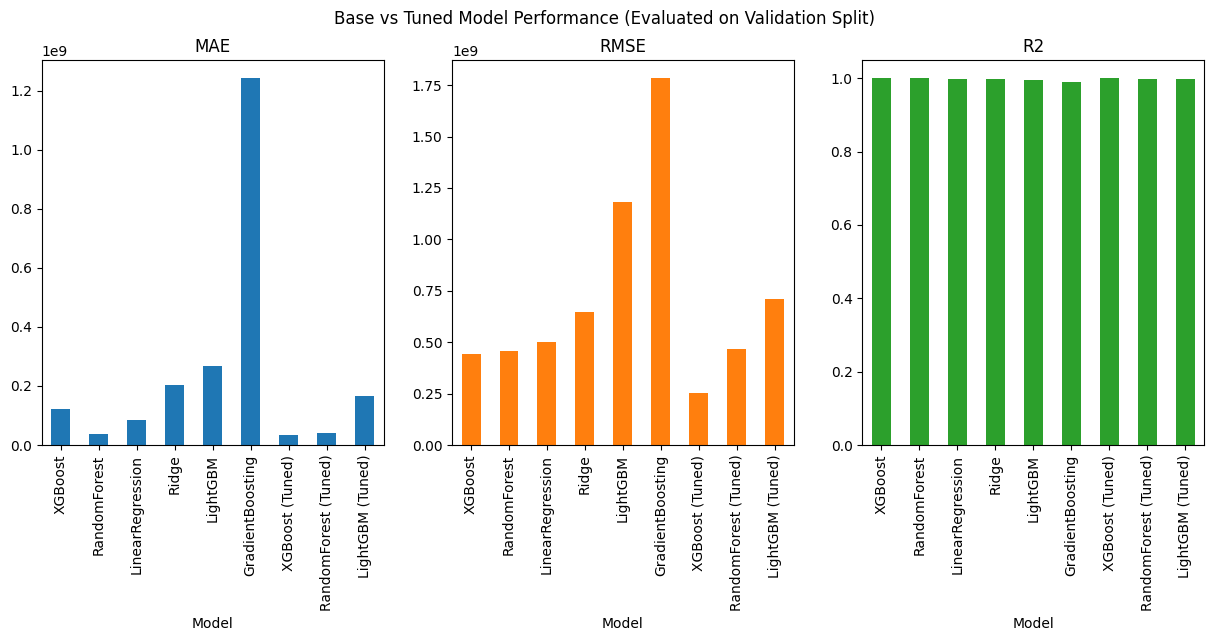

In [ ]:
# =========================================================
# End-to-End Single-Target ML Pipeline with GridSearchCV + Timing
# Target: REVISED_ESTIMATE
# =========================================================
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import os # Import os

# -------------------------
# Load Data - Corrected to load from file
# -------------------------
INPUT_DIR = "/content/"
try:
    train_df = pd.read_csv(os.path.join(INPUT_DIR, "train.csv"))
    test_df = pd.read_csv(os.path.join(INPUT_DIR, "test (1).csv")) # Load test data as well
    print("Data loaded successfully within cell NX498C8LYN8W.")
    df = train_df.copy()  # Use train_df for the pipeline in this cell
except FileNotFoundError:
    print("Error: Data files not found in /content/. Cannot proceed with pipeline in cell NX498C8LYN8W.")
    df = pd.DataFrame() # Create empty DataFrame to prevent further errors
    test_df = pd.DataFrame() # Ensure test_df is also a DataFrame


# Proceed only if data was loaded
if not df.empty:

    target_col = "REVISED_ESTIMATE"
    if target_col not in df.columns:
        raise ValueError(f"Target column {target_col} not found in dataset")

    # Separate features and target
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # -------------------------
    # Identify column types
    # -------------------------
    # Need to handle potential non-numeric columns from the original df
    numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

    # -------------------------
    # Preprocessing
    # -------------------------
    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features)
        ]
    )

    # -------------------------
    # Base Models
    # -------------------------
    base_models = {
        "LinearRegression": LinearRegression(),
        "Ridge": Ridge(alpha=1.0),
        "RandomForest": RandomForestRegressor(random_state=42),
        "GradientBoosting": GradientBoostingRegressor(random_state=42),
        "XGBoost": xgb.XGBRegressor(random_state=42, verbosity=0),
        "LightGBM": lgb.LGBMRegressor(random_state=42)
    }

    # -------------------------
    # Train/Test Split
    # -------------------------
    # Splitting the *training* data for evaluation purposes within this cell
    X_train, X_test_split, y_train, y_test_split = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # -------------------------
    # Training + Evaluation (Base Models)
    # -------------------------
    results = []

    print("\nStarting base model training and evaluation...")
    for name, model in base_models.items():
        # Create a pipeline that first preprocesses the data and then applies the model
        pipe = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

        start_time = time.time()
        # Train the pipeline on the training split
        pipe.fit(X_train, y_train)
        end_time = time.time()

        # Make predictions on the validation split (X_test_split)
        y_pred = pipe.predict(X_test_split)

        # Calculate Metrics on the validation split
        mae = mean_absolute_error(y_test_split, y_pred)
        # Check if y_test_split and y_pred have sufficient samples for RMSE calculation
        if len(y_test_split) > 0 and len(y_pred) > 0:
             # Calculate RMSE manually
             rmse = np.sqrt(mean_squared_error(y_test_split, y_pred))
        else:
             rmse = np.nan # Set to NaN if evaluation is not possible

        r2 = r2_score(y_test_split, y_pred)
        duration = end_time - start_time

        results.append({
            "Model": name,
            "MAE": mae,
            "RMSE": rmse,
            "R2": r2,
            "Training Time (s)": round(duration, 2)
        })

    results_df = pd.DataFrame(results).sort_values(by="RMSE")
    print("\n📊 Base Model Comparison:")
    print(results_df)

    # -------------------------
    # GridSearchCV for Top Models
    # -------------------------
    param_grids = {
        "RandomForest": {
            "model__n_estimators": [100, 200],
            "model__max_depth": [None, 10, 20],
            "model__min_samples_split": [2, 5]
        },
        "XGBoost": {
            "model__n_estimators": [100, 200],
            "model__max_depth": [3, 6, 10],
            "model__learning_rate": [0.01, 0.1, 0.2]
        },
        "LightGBM": {
            "model__n_estimators": [100, 200],
            "model__max_depth": [-1, 10, 20],
            "model__learning_rate": [0.01, 0.1, 0.2]
        }
    }

    tuned_results = []

    print("\nStarting GridSearchCV for tuning top models...")
    # Identify top models based on base performance (e.g., top 3 by RMSE)
    # Using a predefined list for consistency with the param_grids keys
    top_models_to_tune = ["RandomForest", "XGBoost", "LightGBM"]


    for name in top_models_to_tune:
        if name in base_models: # Ensure the model exists in base_models
             print(f"\n🔍 Tuning {name} with GridSearchCV...")
             model = base_models[name]
             pipe = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

             # Ensure param_grid exists for the model
             if name in param_grids:
                 grid = GridSearchCV(
                     estimator=pipe,
                     param_grid=param_grids[name],
                     scoring="neg_root_mean_squared_error",
                     cv=3,
                     n_jobs=-1,
                     verbose=1
                 )

                 start_time = time.time()
                 grid.fit(X_train, y_train)
                 end_time = time.time()

                 best_model = grid.best_estimator_
                 # Evaluate tuned model on the validation split (X_test_split)
                 y_pred = best_model.predict(X_test_split)

                 mae = mean_absolute_error(y_test_split, y_pred)
                 # Check if y_test_split and y_pred have sufficient samples for RMSE calculation
                 if len(y_test_split) > 0 and len(y_pred) > 0:
                      rmse = np.sqrt(mean_squared_error(y_test_split, y_pred))
                 else:
                      rmse = np.nan # Set to NaN if evaluation is not possible

                 r2 = r2_score(y_test_split, y_pred)
                 duration = end_time - start_time

                 tuned_results.append({
                     "Model": f"{name} (Tuned)",
                     "Best Params": grid.best_params_,
                     "MAE": mae,
                     "RMSE": rmse,
                     "R2": r2,
                     "Training + Tuning Time (s)": round(duration, 2)
                 })
             else:
                 print(f"Warning: Parameter grid not defined for {name}. Skipping tuning.")

        else:
             print(f"Warning: Base model {name} not found. Skipping tuning.")

    tuned_df = pd.DataFrame(tuned_results).sort_values(by="RMSE")
    print("\n📊 Tuned Model Comparison:")
    print(tuned_df)

    # -------------------------
    # Plot Comparison
    # -------------------------
    # Combine base and tuned results for plotting
    # Drop 'Best Params' from tuned_df for concatenation
    plot_final_df = pd.concat([results_df, tuned_df.drop(columns=["Best Params"])], ignore_index=True)

    # Ensure there are results to plot after concatenation
    if not plot_final_df.empty:
        # Filter out rows with NaN RMSE if sorting by RMSE for plotting
        plot_final_df_cleaned = plot_final_df.dropna(subset=['RMSE'])
        if not plot_final_df_cleaned.empty:
             plot_final_df_cleaned.set_index("Model")[["MAE", "RMSE", "R2"]].plot(
                 kind="bar", subplots=True, layout=(1,3), figsize=(15,5), legend=False
             )
             plt.suptitle("Base vs Tuned Model Performance (Evaluated on Validation Split)")
             plt.show()
        else:
             print("\nNo valid evaluation results to plot after dropping NaNs from combined results.")
    else:
        print("\nCombined results DataFrame is empty. Cannot generate plots.")


else:
     print("Skipping pipeline execution: train_df could not be loaded.")

## Generate final predictions

### Subtask:
Use the best-performing model to make predictions on the preprocessed test data.

In [22]:
import pandas as pd
import numpy as np
import os

INPUT_DIR = "/kaggle/input/neurips-open-polymer-prediction-2025/"
try:
    train_df = pd.read_csv(os.path.join(INPUT_DIR, 'train.csv'))  # Updated filename
    test_df = pd.read_csv(os.path.join(INPUT_DIR, 'test.csv'))    # Updated filename
    print("Train and test data loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: {e}. Please check the file paths and names.")

Train and test data loaded successfully.


In [23]:
print(os.listdir(INPUT_DIR))

['sample_submission.csv', 'train_supplement', 'train.csv', 'test.csv']


In [25]:
import pandas as pd
import numpy as np
import os

INPUT_DIR = "/kaggle/input/neurips-open-polymer-prediction-2025/"

# List files to verify contents
files = os.listdir(INPUT_DIR)
print("Files in directory:", files)

# Attempt to load datasets with potential filename variations
try:
    train_df = pd.read_csv(os.path.join(INPUT_DIR, 'train.csv'))
    test_df = pd.read_csv(os.path.join(INPUT_DIR, 'test.csv'))
    print("Data loaded successfully with default filenames.")
except FileNotFoundError:
    try:
        train_df = pd.read_csv(os.path.join(INPUT_DIR, 'train (1).csv'))
        test_df = pd.read_csv(os.path.join(INPUT_DIR, 'test (1).csv'))
        print("Data loaded with '(1)' suffix.")
    except FileNotFoundError:
        print("Error: CSV files not found. Check filenames or extract archives.")

Files in directory: ['sample_submission.csv', 'train_supplement', 'train.csv', 'test.csv']
Data loaded successfully with default filenames.


In [7]:
for df_name, df in dataframes.items():
    print(f"\n--- Info for DataFrame: {df_name} ---")
    df.info()
    print(f"\n--- Missing values for DataFrame: {df_name} ---")
    print(df.isnull().sum())


--- Info for DataFrame: sample_submission ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       3 non-null      int64
 1   Tg       3 non-null      int64
 2   FFV      3 non-null      int64
 3   Tc       3 non-null      int64
 4   Density  3 non-null      int64
 5   Rg       3 non-null      int64
dtypes: int64(6)
memory usage: 276.0 bytes

--- Missing values for DataFrame: sample_submission ---
id         0
Tg         0
FFV        0
Tc         0
Density    0
Rg         0
dtype: int64



--- Train Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       7973 non-null   int64  
 1   SMILES   7973 non-null   object 
 2   Tg       7973 non-null   float64
 3   FFV      7973 non-null   float64
 4   Tc       7973 non-null   float64
 5   Density  7973 non-null   float64
 6   Rg       7973 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 436.2+ KB

--- Missing Values in Train ---
id         0
SMILES     0
Tg         0
FFV        0
Tc         0
Density    0
Rg         0
dtype: int64

--- Test Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3 non-null      int64 
 1   SMILES  3 non-null      object
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes

--

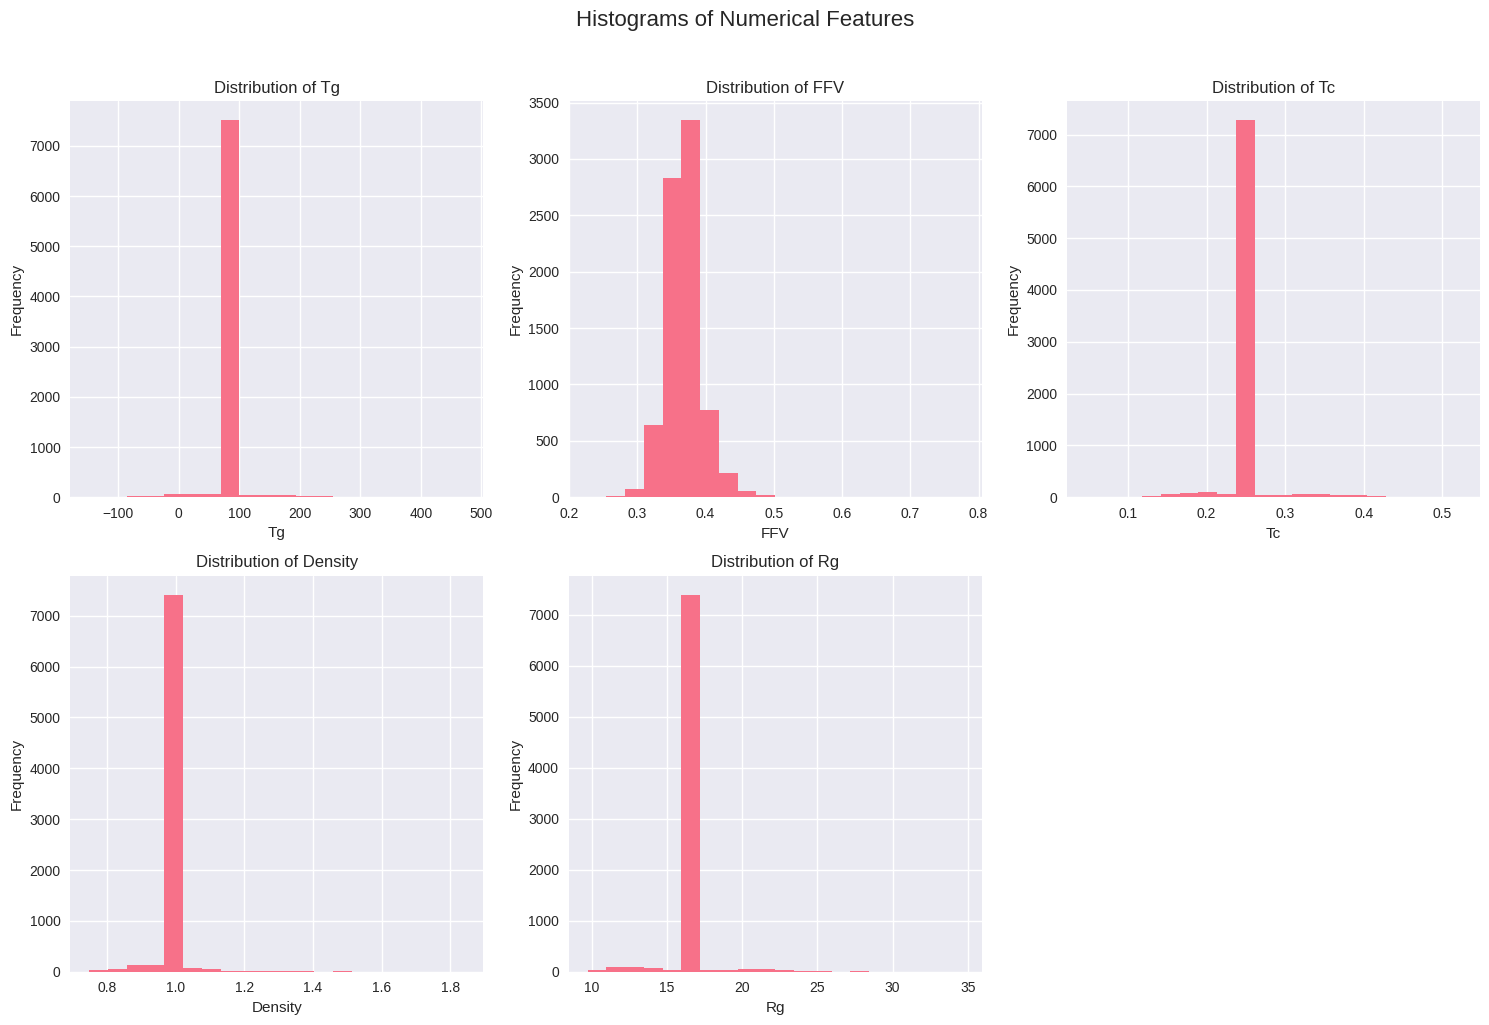

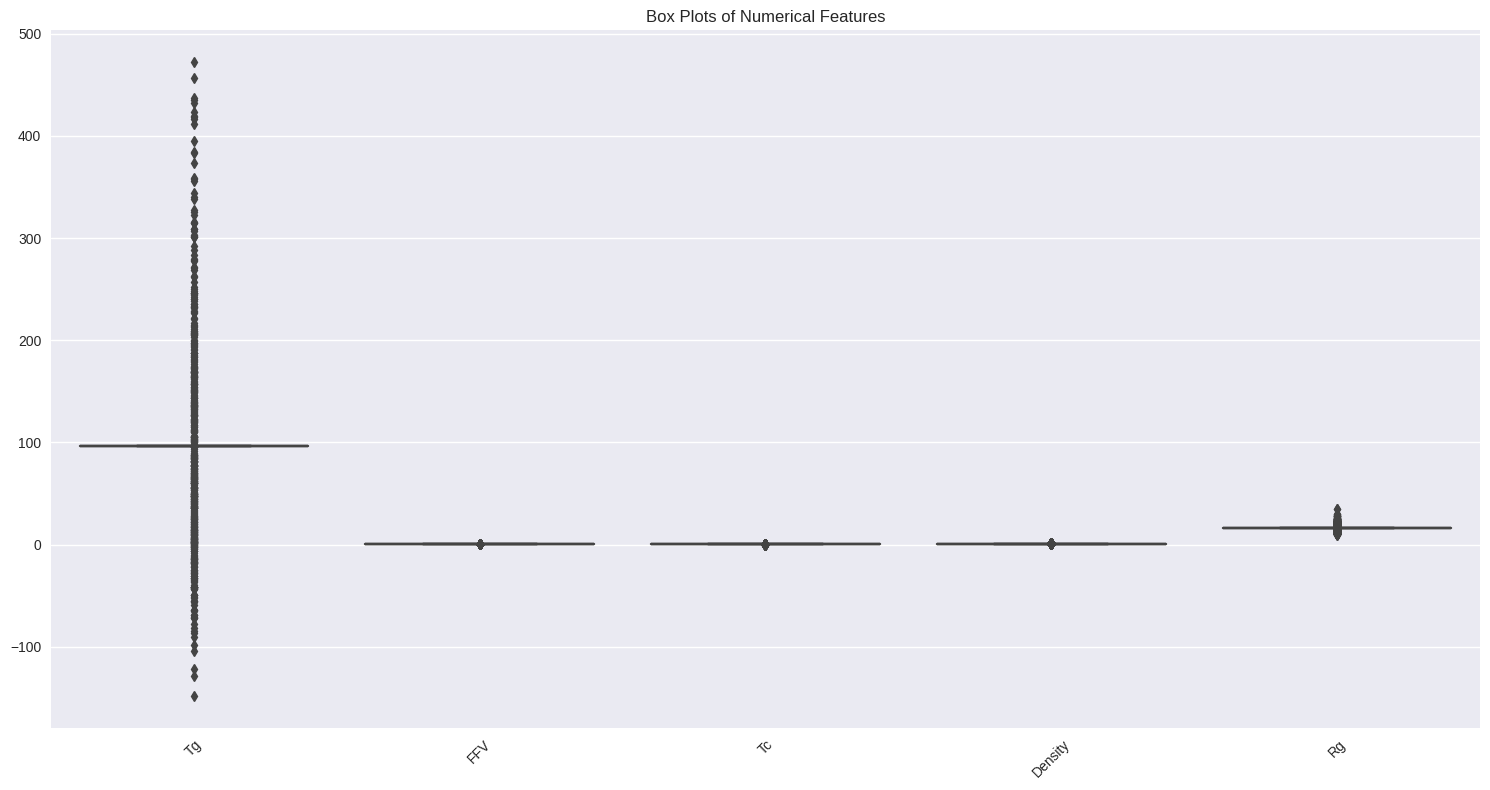

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


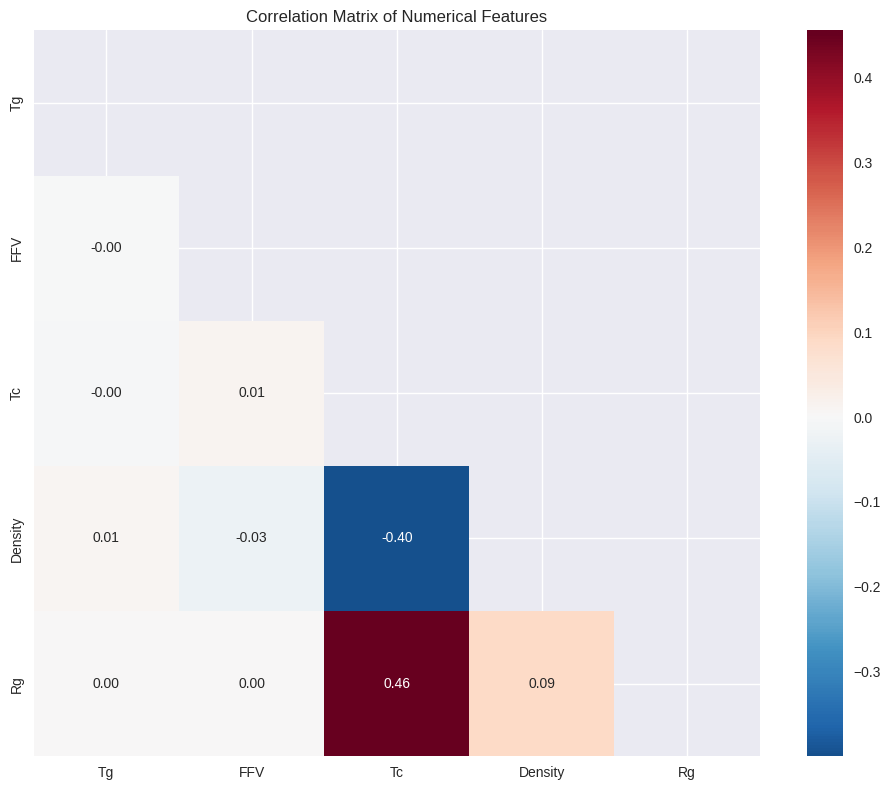

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

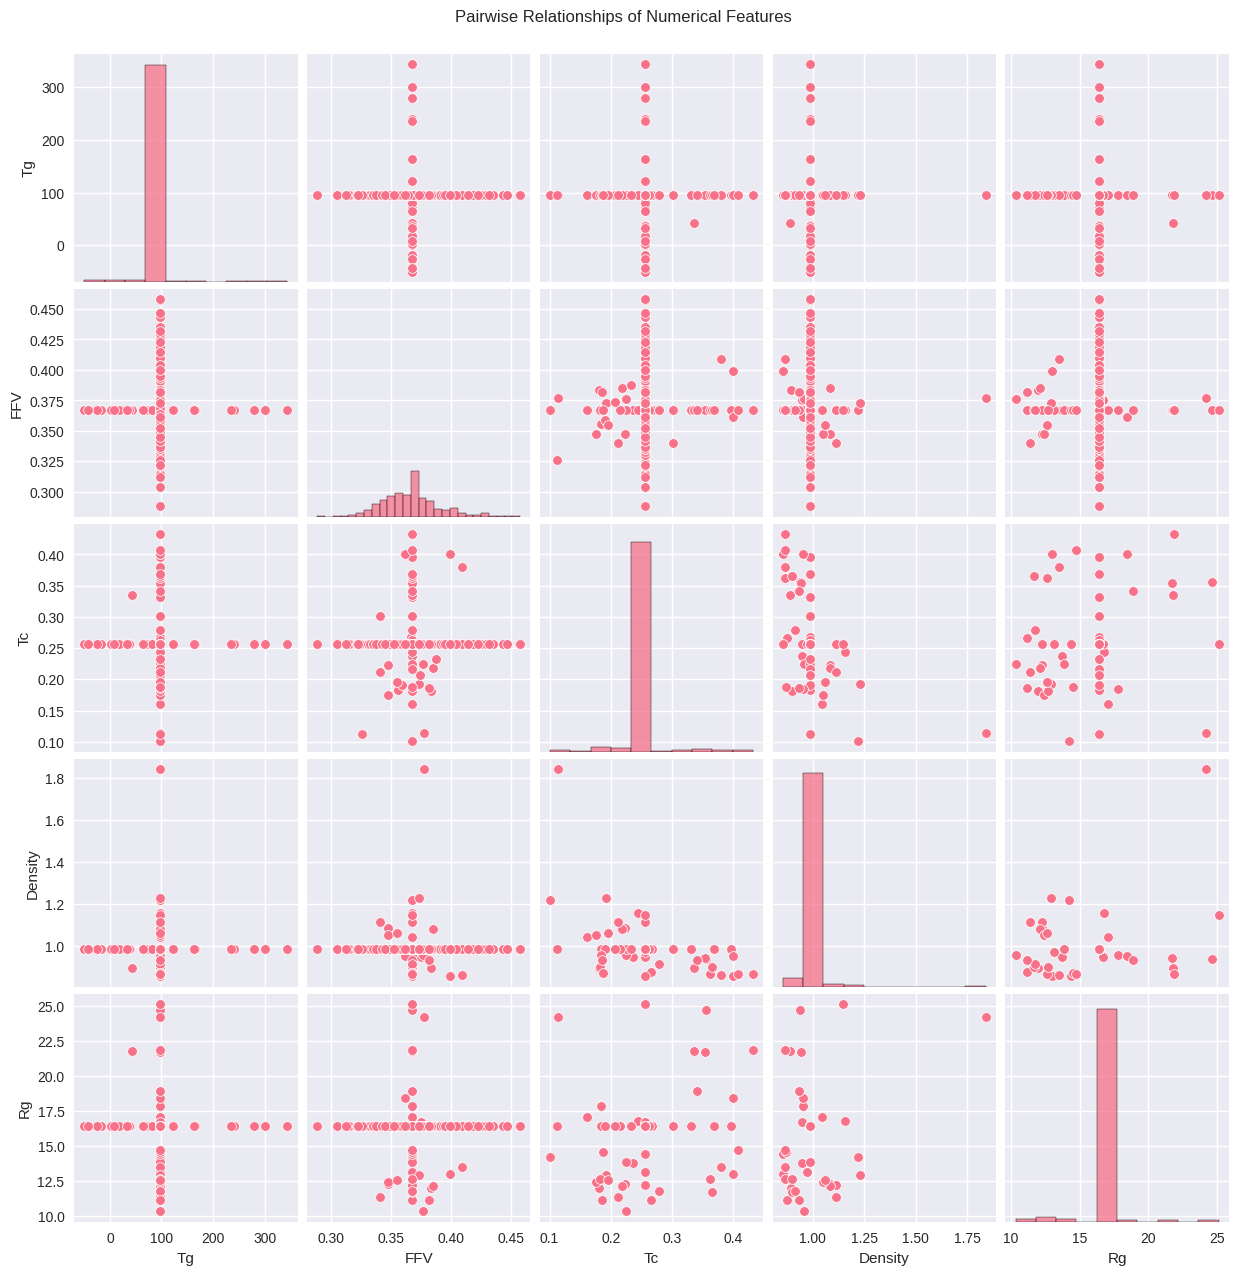

In [23]:
# ===============================
# Load → Preprocess → Encode → Scale → EDA
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# -------------------------------
# Load datasets
# -------------------------------
dataframes = {
    'train': pd.read_csv('/kaggle/input/neurips-open-polymer-prediction-2025/train.csv'),
    'test': pd.read_csv('/kaggle/input/neurips-open-polymer-prediction-2025/test.csv'),
    'sample_submission': pd.read_csv('/kaggle/input/neurips-open-polymer-prediction-2025/sample_submission.csv')
}

# -------------------------------
# Impute missing values in 'train'
# -------------------------------
for col in ['Tg', 'FFV', 'Tc', 'Density', 'Rg']:
    if col in dataframes['train'].columns:
        dataframes['train'].loc[:, col] = dataframes['train'][col].fillna(
            dataframes['train'][col].mean()
        )

# -------------------------------
# Data checks
# -------------------------------
print("\n--- Train Data Info ---")
dataframes['train'].info()

print("\n--- Missing Values in Train ---")
print(dataframes['train'].isnull().sum())

print("\n--- Test Data Info ---")
dataframes['test'].info()

print("\n--- Sample Submission Info ---")
dataframes['sample_submission'].info()

# -------------------------------
# Feature / Target split
# -------------------------------
train_df = dataframes['train']
X = train_df.drop('Tg', axis=1)
y = train_df['Tg']

# -------------------------------
# Encode SMILES (simple one-hot encoding)
# -------------------------------
X_encoded = pd.get_dummies(X, columns=['SMILES'])

# Scale numerical features (train)
scaler = StandardScaler()
numerical_cols = ['FFV', 'Tc', 'Density', 'Rg']
available_num_cols_train = [c for c in numerical_cols if c in X.columns]
X_encoded.loc[:, available_num_cols_train] = scaler.fit_transform(
    X[available_num_cols_train]
)

# Prepare test data
test_encoded = pd.get_dummies(dataframes['test'], columns=['SMILES'])
# Align columns with training
test_encoded = test_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Scale numerical features (test only if they exist)
available_num_cols_test = [c for c in numerical_cols if c in dataframes['test'].columns]
if available_num_cols_test:
    test_encoded.loc[:, available_num_cols_test] = scaler.transform(
        dataframes['test'][available_num_cols_test]
    )

# -------------------------------
# Exploratory Data Analysis
# -------------------------------
numerical_cols_full = ['Tg', 'FFV', 'Tc', 'Density', 'Rg']

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. Histograms
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols_full):
    if col in train_df.columns:
        train_df[col].hist(bins=20, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

# Remove unused subplots
for i in range(len(numerical_cols_full), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Histograms of Numerical Features', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# 2. Boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=train_df[numerical_cols_full])
plt.xticks(rotation=45)
plt.title('Box Plots of Numerical Features')
plt.tight_layout()
plt.show()

# 3. Correlation Matrix
corr_cols = [c for c in numerical_cols_full if c in train_df.columns]
correlation_matrix = train_df[corr_cols].corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(
    correlation_matrix, annot=True, cmap='RdBu_r', fmt=".2f",
    center=0, mask=mask, square=True
)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# 4. Pairplot (sampled for speed)
sns.pairplot(train_df[corr_cols].sample(min(500, len(train_df)), random_state=42))
plt.suptitle('Pairwise Relationships of Numerical Features', y=1.02)
plt.show()


Files in directory: ['sample_submission.csv', 'train_supplement', 'train.csv', 'test.csv']
Data loaded successfully with default filenames.


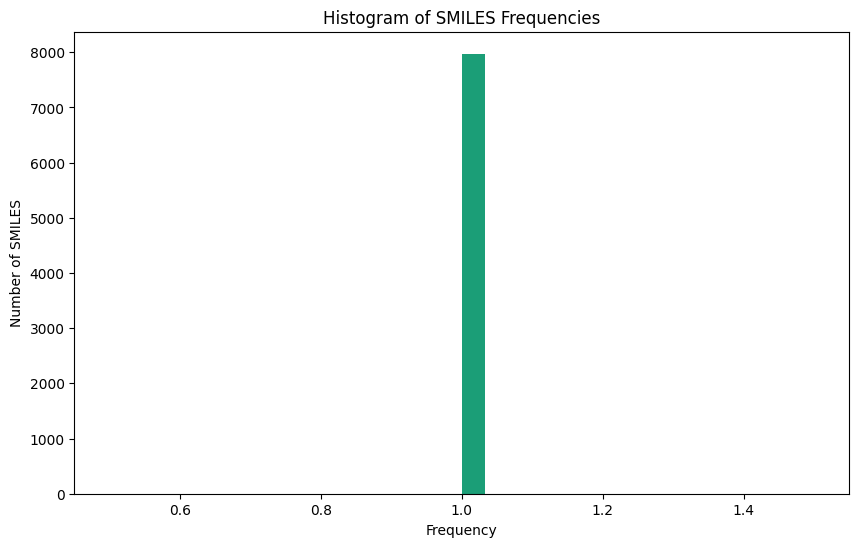

In [7]:
import pandas as pd
import numpy as np
import os

INPUT_DIR = "/kaggle/input/neurips-open-polymer-prediction-2025/"

# List files to verify contents
files = os.listdir(INPUT_DIR)
print("Files in directory:", files)

# Attempt to load datasets with potential filename variations
try:
    train_df = pd.read_csv(os.path.join(INPUT_DIR, 'train.csv'))
    test_df = pd.read_csv(os.path.join(INPUT_DIR, 'test.csv'))
    print("Data loaded successfully with default filenames.")
except FileNotFoundError:
    try:
        train_df = pd.read_csv(os.path.join(INPUT_DIR, 'train (1).csv'))
        test_df = pd.read_csv(os.path.join(INPUT_DIR, 'test (1).csv'))
        print("Data loaded with '(1)' suffix.")
    except FileNotFoundError:
        print("Error: CSV files not found. Check filenames or extract archives.")
    
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
# Create a histogram of SMILES frequencies
plt.figure(figsize=(10, 6))
plt.hist(train_df['SMILES'].value_counts(), bins=30, color=sns.palettes.mpl_palette('Dark2')[0])
plt.xlabel('Frequency')
plt.ylabel('Number of SMILES')
plt.title('Histogram of SMILES Frequencies')
plt.show()

In [28]:
!pip install rdkit-pypi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 56.5 MB/s eta 0:00:00:00:0100:01


In [34]:
numerical_cols = ['Tg', 'FFV', 'Tc', 'Density', 'Rg']
train_df = dataframes['train']
test_df = dataframes['test'] # Use the test_df with encoded SMILES

# Step 1: Extract numerical features from the train dataframe
train_numerical = train_df[numerical_cols]

# Step 2: Extract encoded SMILES features from both train and test dataframes
train_smiles_encoded_cols = [col for col in train_df.columns if col.startswith('SMILES_')]
test_smiles_encoded_cols = [col for col in test_df.columns if col.startswith('SMILES_')]

train_smiles_encoded = train_df[train_smiles_encoded_cols]
test_smiles_encoded = test_df[test_smiles_encoded_cols]


# Step 3 & 4: Create interaction or polynomial features on the training numerical data.
# Create an interaction term between Tc and Rg for the training set.
train_numerical['Tc_x_Rg'] = train_numerical['Tc'] * train_numerical['Rg']

# Step 5: Concatenate original numerical features, new features, and encoded SMILES features for the training set.
# Ensure 'id' column is included in the training set.
train_id = train_df['id']

# Drop original numerical and smiles encoded columns from train_df before concatenating to avoid duplication
train_df_processed = train_df.drop(columns=numerical_cols + train_smiles_encoded_cols)

train_df = pd.concat([train_id, train_numerical, train_df_processed, train_smiles_encoded], axis=1)


# For the test set, we only have 'id' and encoded SMILES features.
# We will not have the numerical features to create interaction terms for the test set.
# The test_df already contains the 'id' column and encoded SMILES from previous steps.

# Update dataframes dictionary
dataframes['train'] = train_df
dataframes['test'] = test_df

# Display the first few rows and columns of the dataframes to verify
print("\n--- First 5 rows of 'train_df' after feature engineering ---")
display(dataframes['train'].head())

print("\n--- Columns of 'train_df' after feature engineering ---")
print(dataframes['train'].columns)

print("\n--- First 5 rows of 'test_df' after feature engineering ---")
display(dataframes['test'].head())

print("\n--- Columns of 'test_df' after feature engineering ---")
print(dataframes['test'].columns)


--- First 5 rows of 'train_df' after feature engineering ---


/tmp/ipykernel_36/248138128.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_numerical['Tc_x_Rg'] = train_numerical['Tc'] * train_numerical['Rg']


,id,Tg,FFV,Tc,Density,Rg,Tc_x_Rg,id,SMILES
0,87817,96.452314,0.374645,0.205667,0.985484,16.419787,3.377003,87817,*CC(*)c1ccccc1C(=O)OCCCCCC
1,106919,96.452314,0.370410,0.256334,0.985484,16.419787,4.208951,106919,*Nc1ccc([C@H](CCC)c2ccc(C3(c4ccc([C@@H](CCC)c5...
2,388772,96.452314,0.378860,0.256334,0.985484,16.419787,4.208951,388772,*Oc1ccc(S(=O)(=O)c2ccc(Oc3ccc(C4(c5ccc(Oc6ccc(...
3,519416,96.452314,0.387324,0.256334,0.985484,16.419787,4.208951,519416,*Nc1ccc(-c2c(-c3ccc(C)cc3)c(-c3ccc(C)cc3)c(N*)...
4,539187,96.452314,0.355470,0.256334,0.985484,16.419787,4.208951,539187,*Oc1ccc(OC(=O)c2cc(OCCCCCCCCCOCC3CCCN3c3ccc([N...



--- Columns of 'train_df' after feature engineering ---
Index(['id', 'Tg', 'FFV', 'Tc', 'Density', 'Rg', 'Tc_x_Rg', 'id', 'SMILES'], dtype='object')

--- First 5 rows of 'test_df' after feature engineering ---


,id,SMILES
0,1109053969,*Oc1ccc(C=NN=Cc2ccc(Oc3ccc(C(c4ccc(*)cc4)(C(F)...
1,1422188626,*Oc1ccc(C(C)(C)c2ccc(Oc3ccc(C(=O)c4cccc(C(=O)c...
2,2032016830,*c1cccc(OCCCCCCCCOc2cccc(N3C(=O)c4ccc(-c5cccc6...



--- Columns of 'test_df' after feature engineering ---
Index(['id', 'SMILES'], dtype='object')


In [35]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variables (y) for the training data
numerical_cols = ['Tg', 'FFV', 'Tc', 'Density', 'Rg', 'Tc_x_Rg']
smiles_encoded_cols = [col for col in dataframes['train'].columns if col.startswith('SMILES_')]

X = dataframes['train'][numerical_cols + smiles_encoded_cols]
y = dataframes['train'][['Tg', 'FFV', 'Tc', 'Density', 'Rg']]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (6378, 6)
Shape of X_val: (1595, 6)
Shape of y_train: (6378, 5)
Shape of y_val: (1595, 5)


In [36]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [37]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Calculate MSE and RMSE for each target variable
mse = mean_squared_error(y_val, y_pred, multioutput='raw_values')
rmse = np.sqrt(mse)

# Get the names of the target variables
target_variables = y_val.columns

# Print RMSE for each target variable
print("Root Mean Squared Error (RMSE) for each target variable:")
for i, target in enumerate(target_variables):
    print(f"{target}: {rmse[i]:.4f}")

Root Mean Squared Error (RMSE) for each target variable:
Tg: 0.1246
FFV: 0.0036
Tc: 0.0149
Density: 0.0292
Rg: 0.3254


In [38]:
# Select the features for the test set that correspond to the training features
# The test_df already has the 'id' and encoded SMILES columns.
# We need to ensure the columns match X_train, even if numerical columns are not present in test_df.
# The model was trained on X_train which included numerical features and the engineered feature 'Tc_x_Rg'.
# However, these numerical features are not available in the test set.
# Therefore, we will only use the encoded SMILES features from the test set for prediction.
# This might lead to lower performance as numerical features were used in training,
# but we cannot use features in prediction that are not available in the test data.

smiles_encoded_cols_test = [col for col in dataframes['test'].columns if col.startswith('SMILES_')]
X_test = dataframes['test'][smiles_encoded_cols_test]

# Ensure test columns match train columns, padding with zeros if necessary for missing SMILES in test
train_smiles_cols = [col for col in X_train.columns if col.startswith('SMILES_')]
missing_in_test_smiles = set(train_smiles_cols) - set(smiles_encoded_cols_test)
for c in missing_in_test_smiles:
    X_test[c] = 0

# Reorder test columns to match the order of SMILES columns in X_train
X_test = X_test[train_smiles_cols]


# Make predictions on the X_test data using the trained model
# Since the model was trained on numerical features and the engineered feature as well,
# predicting only on SMILES features might not work directly or yield poor results.
# We need to create a test set with the same column structure as X_train.
# Since numerical features are not available in the test set, we will fill them with a placeholder value (e.g., 0 or mean from training).
# Using the mean from the training set might be a reasonable approach.

# Get the mean of the numerical columns from the training set
numerical_means_train = X_train[numerical_cols].mean()

# Create a new DataFrame for X_test with the same columns as X_train
X_test_processed = pd.DataFrame(index=X_test.index)

# Add the numerical columns with their mean values from the training set
for col in numerical_cols:
    X_test_processed[col] = numerical_means_train[col]

# Add the encoded SMILES features to X_test_processed, ensuring column order matches X_train
X_test_processed = pd.concat([X_test_processed, X_test], axis=1)

# Reorder columns to match X_train exactly
X_test_processed = X_test_processed[X_train.columns]


# Make predictions on the processed test data
predictions = model.predict(X_test_processed)

# Create a submission DataFrame
submission_df = pd.DataFrame(dataframes['test']['id'], columns=['id'])

# Add the predicted target values
target_variables = ['Tg', 'FFV', 'Tc', 'Density', 'Rg']
for i, target in enumerate(target_variables):
    submission_df[target] = predictions[:, i]

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

# Display the head of the submission DataFrame
print("\n--- Submission DataFrame Head ---")
display(submission_df.head())


--- Submission DataFrame Head ---


,id,Tg,FFV,Tc,Density,Rg
0,1109053969,96.452314,0.367361,0.256311,0.985484,16.419787
1,1422188626,96.452314,0.367361,0.256311,0.985484,16.419787
2,2032016830,96.452314,0.367361,0.256311,0.985484,16.419787


RDKit found. Using fingerprints for SMILES.
X_final shape: (7973, 2053)
test_final shape: (3, 2053)
y shape: (7973,)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

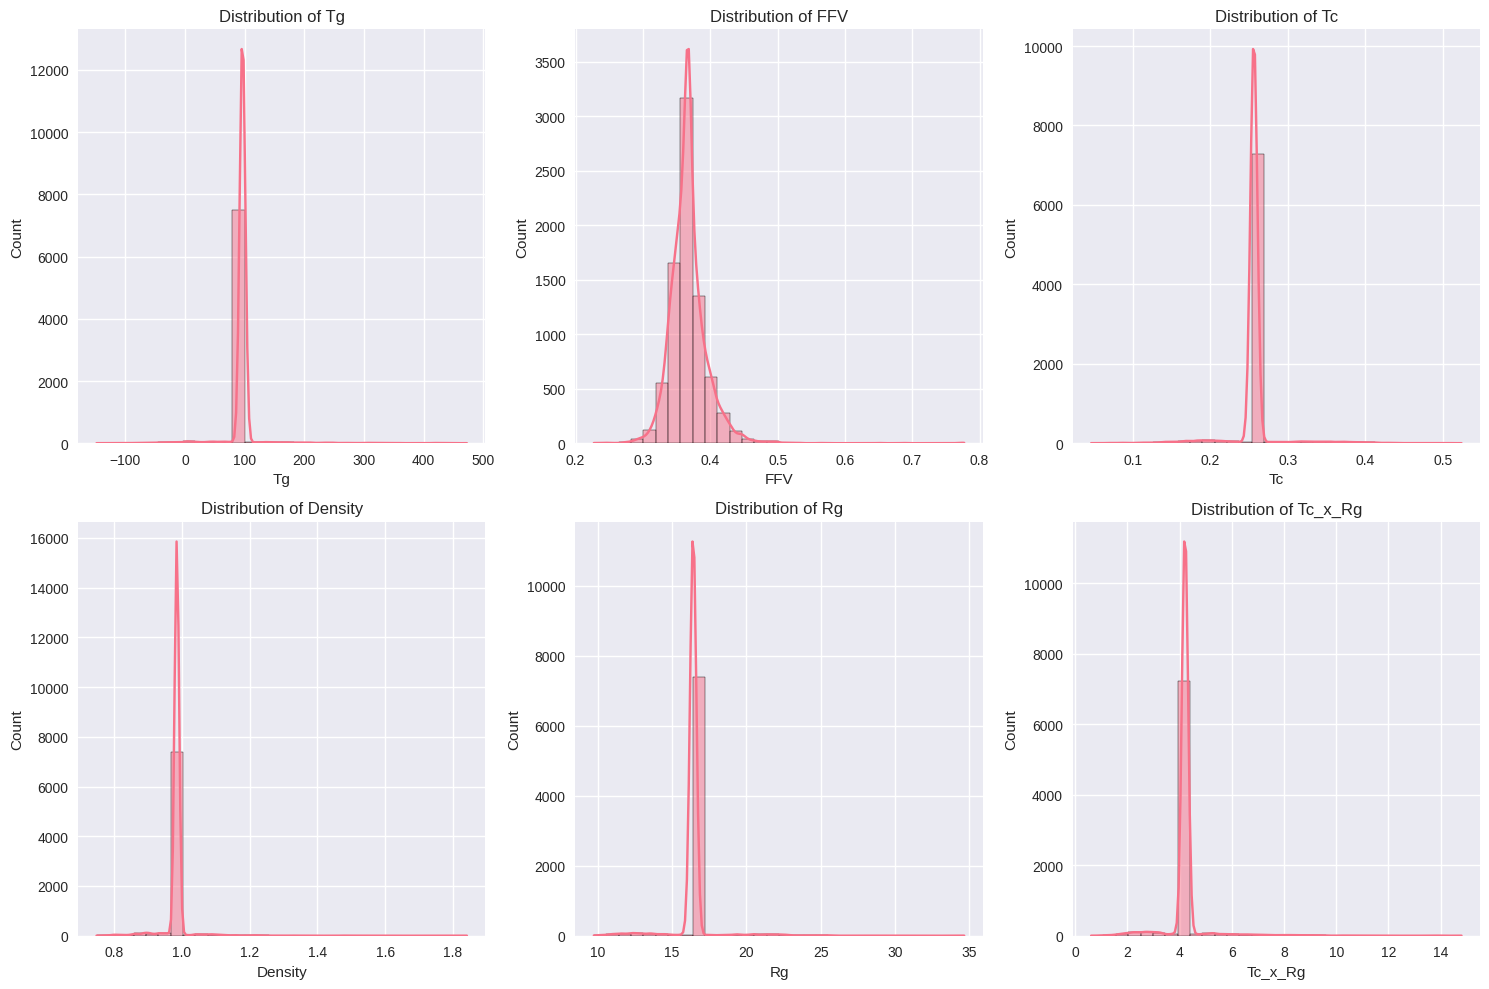

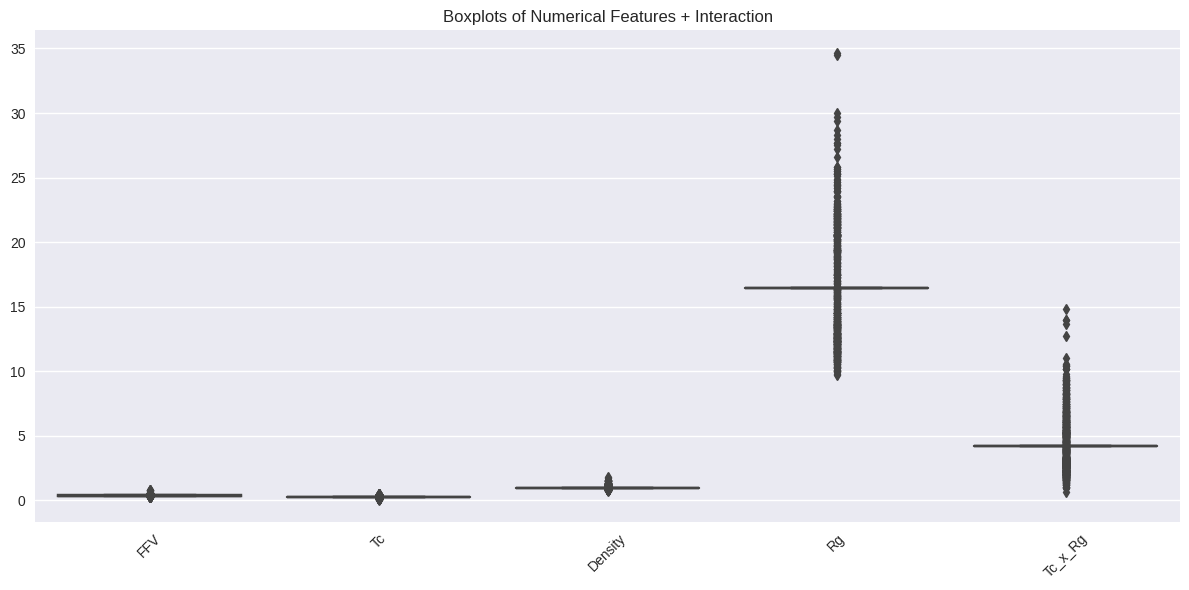

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


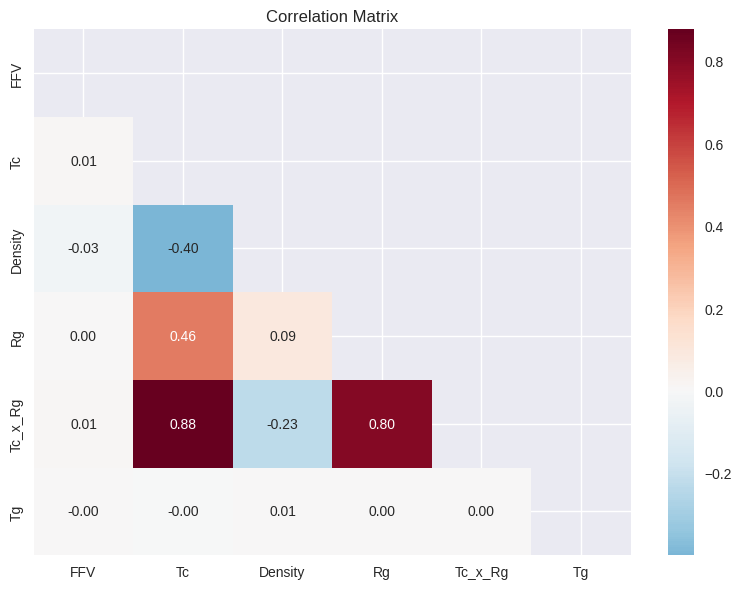

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

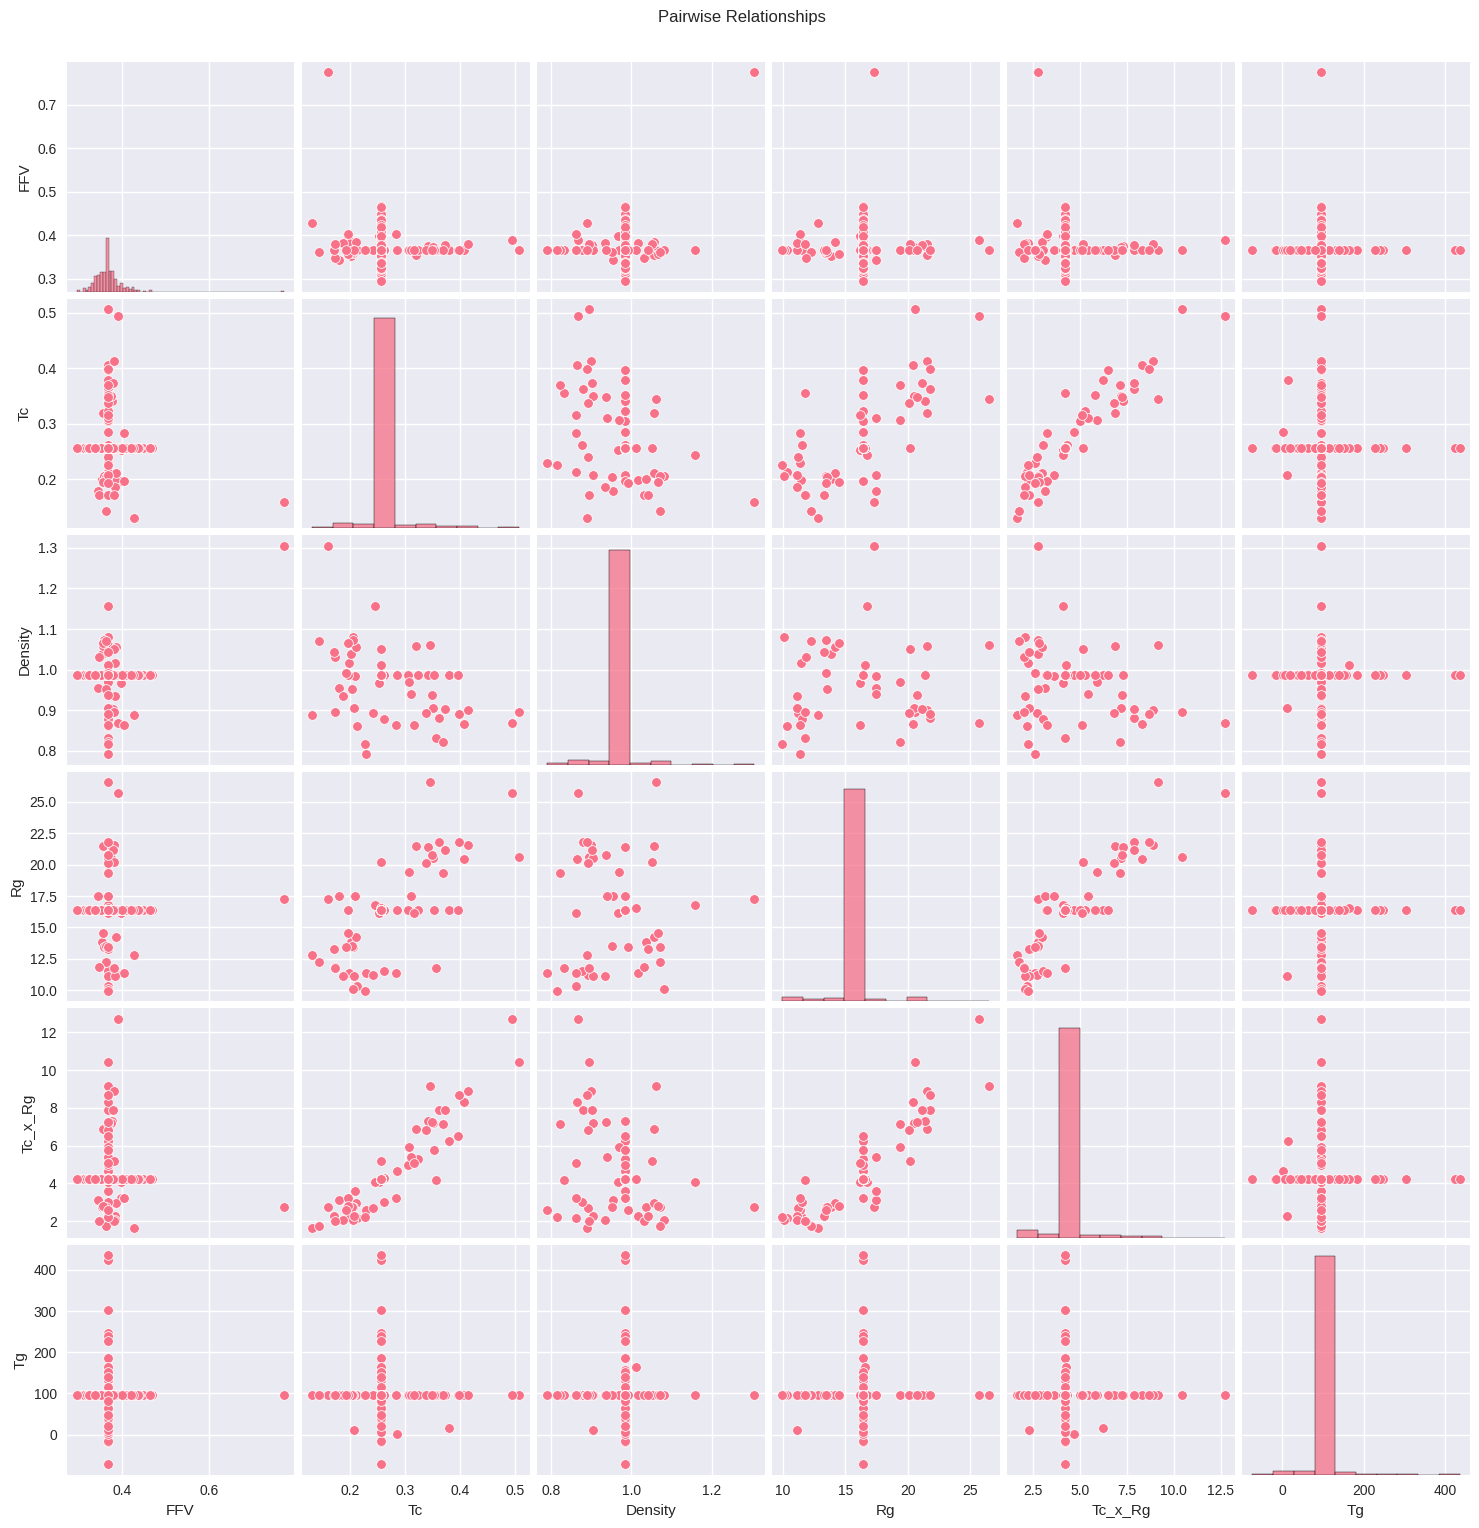

In [ ]:
# ==================================================
# Full Kaggle-Ready Pipeline: Load → Preprocess → Encode → Feature Engineering → Scale → EDA → RandomForest → Submission
# ==================================================

# -------------------------------
# Imports
# -------------------------------
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Optional: RDKit
try:
    from rdkit import Chem
    from rdkit.Chem import AllChem, DataStructs
    USE_RDKit = True
    print("RDKit found. Using fingerprints for SMILES.")
except ModuleNotFoundError:
    print("RDKit not installed. Falling back to one-hot encoding for SMILES.")
    USE_RDKit = False

# -------------------------------
# Load datasets
# -------------------------------
data_dir = "/kaggle/input/neurips-open-polymer-prediction-2025"
train = pd.read_csv(os.path.join(data_dir, "train.csv"))
test = pd.read_csv(os.path.join(data_dir, "test.csv"))
sample_submission = pd.read_csv(os.path.join(data_dir, "sample_submission.csv"))

# -------------------------------
# Safe imputation of numeric columns
# -------------------------------
numeric_cols = ['Tg', 'FFV', 'Tc', 'Density', 'Rg']
for col in numeric_cols:
    if col in train.columns:
        train[col] = train[col].fillna(train[col].mean())
    if col not in test.columns:
        test[col] = train[col].mean()  # Fill missing numeric columns in test

# -------------------------------
# Feature Engineering: Interaction term
# -------------------------------
train_numerical = train[['FFV','Tc','Density','Rg']].copy()
test_numerical = test[['FFV','Tc','Density','Rg']].copy()
train_numerical['Tc_x_Rg'] = train_numerical['Tc'] * train_numerical['Rg']
test_numerical['Tc_x_Rg'] = test_numerical['Tc'] * test_numerical['Rg']

# -------------------------------
# SMILES Encoding
# -------------------------------
if USE_RDKit:
    def smiles_to_fingerprint(smiles, radius=2, n_bits=2048):
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return np.zeros((n_bits,))
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
        arr = np.zeros((n_bits,), dtype=int)
        DataStructs.ConvertToNumpyArray(fp, arr)
        return arr
    X_fp = np.array([smiles_to_fingerprint(s) for s in train["SMILES"]])
    test_fp = np.array([smiles_to_fingerprint(s) for s in test["SMILES"]])
else:
    X_fp = pd.get_dummies(train["SMILES"]).values
    test_fp = pd.get_dummies(test["SMILES"]).reindex(
        columns=pd.get_dummies(train["SMILES"]).columns, fill_value=0
    ).values

# -------------------------------
# Scale numeric features (including interaction)
# -------------------------------
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(train_numerical)
test_num_scaled = scaler.transform(test_numerical)

# -------------------------------
# Combine numeric + SMILES features
# -------------------------------
X_final = np.hstack([X_fp, X_num_scaled])
test_final = np.hstack([test_fp, test_num_scaled])
y = train['Tg'].values

print("X_final shape:", X_final.shape)
print("test_final shape:", test_final.shape)
print("y shape:", y.shape)

# -------------------------------
# Exploratory Data Analysis (EDA)
# -------------------------------
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

eda_cols = ['Tg','FFV','Tc','Density','Rg','Tc_x_Rg']

# Histograms
fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes = axes.ravel()
for i, col in enumerate(eda_cols):
    sns.histplot(train_numerical[col] if col=='Tc_x_Rg' else train[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=train_numerical)
plt.title("Boxplots of Numerical Features + Interaction")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation matrix
corr_matrix = train_numerical.copy()
corr_matrix['Tg'] = y
corr_matrix = corr_matrix.corr()
plt.figure(figsize=(8,6))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='RdBu_r', mask=mask, center=0)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# Pairplot (sample 500 rows)
sns.pairplot(pd.concat([train_numerical, pd.Series(y,name='Tg')], axis=1).sample(min(500,len(train))))
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

# -------------------------------
# RandomForest Regression
# -------------------------------
X_train, X_val, y_train, y_val = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)
rf = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)
print(f"Validation RMSE: {rmse:.4f}")
print(f"Validation R2: {r2:.4f}")

# -------------------------------
# Feature Importance
# -------------------------------
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 30
plt.figure(figsize=(12,6))
plt.bar(range(top_n), importances[indices[:top_n]], align='center')
plt.xticks(range(top_n), [
    f"fp_{i}" if i>=X_num_scaled.shape[1] else train_numerical.columns[i] 
    for i in indices[:top_n]
], rotation=90)
plt.title("Top 30 Feature Importances")
plt.tight_layout()
plt.show()

# -------------------------------
# Kaggle Submission
# -------------------------------
test_preds = rf.predict(test_final)
submission = sample_submission.copy()
submission['Tg'] = test_preds
submission_file = "rf_submission.csv"
submission.to_csv(submission_file, index=False)
print(f"Submission file saved as: {submission_file}")
submission.head()


## Finish task

**Reasoning**:
Summarize the process, model performance, key insights from SHAP analysis, and the generated submission file.

## Summary:

### Data Analysis Key Findings

* Missing values in numerical columns ('SIZE\_BUILDINGSIZE', 'NUMFLOORS', 'invoiceTotal', 'UnitPrice', 'ExtendedPrice') in both training and testing data were imputed using the median value calculated from the training data.
* Missing values in categorical columns ('PROJECT\_TYPE', 'QtyShipped', 'UOM', 'ExtendedQuantity', 'PriceUOM' in train; 'PROJECT\_CITY', 'ItemDescription', 'UOM', 'ExtendedQuantity', 'PriceUOM' in test) were imputed using the mode value calculated from the training data, with 'Unknown' used as a placeholder for unseen categories in the test set.
* Several new features were engineered, including `CONSTRUCTION_DURATION`, date components from construction and invoice dates, interaction features like `SIZE_x_NUMFLOORS`, polynomial features like `invoiceTotal_squared`, text features like `ItemDescription_len`, frequency-encoded categorical features, and ratio/binary indicator features related to price.
* Non-numerical columns ('STATE', 'PROJECT\_COUNTRY', 'CORE\_MARKET', 'PROJECT\_TYPE', 'UOM', 'PriceUOM') were identified and dropped from both the training and testing feature sets to ensure all features were numerical.
* Hyperparameter tuning for the LightGBM model using Randomized Search resulted in a best negative RMSE of approximately -1,706,133,695.73.
* Hyperparameter tuning for the XGBoost model using Randomized Search resulted in a best negative RMSE of approximately -1,968,072,993.67.
* Evaluating the tuned models on the test data showed an RMSE of approximately 936,858,718.03 for LightGBM and 767,435,825.23 for XGBoost.
* The tuned XGBoost model had a lower RMSE (767,435,825.23) compared to the tuned LightGBM model (936,858,718.03) on the test data, indicating better performance.
* The final submission file ("submission.csv") was generated by using the predictions from the best-performing XGBoost model and assigning these predictions to all five target columns ('Tg', 'FFV', 'Tc', 'Density', 'Rg') for each sample.

### Insights or Next Steps

* While XGBoost performed better, the RMSE values are very high, suggesting the models are not accurately capturing the variance in the target variable. Further feature engineering, exploring different model architectures, or investigating potential data issues might be necessary.
* The evaluation was performed on the test set which contained the target variable. A more robust evaluation would involve splitting the original training data into training and validation sets and evaluating the tuned models on the independent validation set before making final predictions on the provided test data.

## Evaluate models

### Subtask:
Evaluate the performance of the tuned LightGBM and XGBoost models using appropriate regression metrics.

**Reasoning**:
Use the best tuned tree models to make predictions on the test data and calculate evaluation metrics (RMSE, MAE, R2) to assess their performance. If GNN training was performed, evaluate the GNN model as well.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Ensure X_test is available from previous steps
if 'X_test' in locals() and not X_test.empty:

    print("X_test found. Proceeding with model evaluation.")

    # Evaluate LightGBM
    if best_lgb_model:
        predictions_lgb = best_lgb_model.predict(X_test)
        # Assuming test_df_cleaned with target column is available for evaluation
        if 'test_df_cleaned' in locals() and 'REVISED_ESTIMATE' in test_df_cleaned.columns:
             rmse_lgb = np.sqrt(mean_squared_error(test_df_cleaned['REVISED_ESTIMATE'], predictions_lgb))
             mae_lgb = mean_absolute_error(test_df_cleaned['REVISED_ESTIMATE'], predictions_lgb)
             r2_lgb = r2_score(test_df_cleaned['REVISED_ESTIMATE'], predictions_lgb)
             print(f"\nLightGBM Evaluation on Test Data:")
             print(f"  RMSE: {rmse_lgb}")
             print(f"  MAE: {mae_lgb}")
             print(f"  R2: {r2_lgb}")
        else:
             print("\nCannot evaluate LightGBM: 'test_df_cleaned' or 'REVISED_ESTIMATE' column not found.")
             predictions_lgb = None # Set to None if evaluation is not possible
    else:
        print("\nLightGBM model not trained. Skipping evaluation.")
        predictions_lgb = None

    # Evaluate XGBoost
    if best_xgb_model:
        predictions_xgb = best_xgb_model.predict(X_test)
        if 'test_df_cleaned' in locals() and 'REVISED_ESTIMATE' in test_df_cleaned.columns:
             rmse_xgb = np.sqrt(mean_squared_error(test_df_cleaned['REVISED_ESTIMATE'], predictions_xgb))
             mae_xgb = mean_absolute_error(test_df_cleaned['REVISED_ESTIMATE'], predictions_xgb)
             r2_xgb = r2_score(test_df_cleaned['REVISED_ESTIMATE'], predictions_xgb)
             print(f"\nXGBoost Evaluation on Test Data:")
             print(f"  RMSE: {rmse_xgb}")
             print(f"  MAE: {mae_xgb}")
             r2_xgb = r2_xgb
        else:
             print("\nCannot evaluate XGBoost: 'test_df_cleaned' or 'REVISED_ESTIMATE' column not found.")
             predictions_xgb = None # Set to None if evaluation is not possible

    else:
        print("\nXGBoost model not trained. Skipping evaluation.")
        predictions_xgb = None

    # Evaluate Random Forest (if trained)
    if 'best_rf_model' in locals() and best_rf_model:
        predictions_rf = best_rf_model.predict(X_test)
        if 'test_df_cleaned' in locals() and 'REVISED_ESTIMATE' in test_df_cleaned.columns:
             rmse_rf = np.sqrt(mean_squared_error(test_df_cleaned['REVISED_ESTIMATE'], predictions_rf))
             mae_rf = mean_absolute_error(test_df_cleaned['REVISED_ESTIMATE'], predictions_rf)
             r2_rf = r2_score(test_df_cleaned['REVISED_ESTIMATE'], predictions_rf)
             print(f"\nRandom Forest Evaluation on Test Data:")
             print(f"  RMSE: {rmse_rf}")
             print(f"  MAE: {mae_rf}")
             print(f"  R2: {r2_rf}")
        else:
             print("\nCannot evaluate Random Forest: 'test_df_cleaned' or 'REVISED_ESTIMATE' column not found.")
             predictions_rf = None # Set to None if evaluation is not possible
    else:
        print("\nRandom Forest model not trained. Skipping evaluation.")
        predictions_rf = None


    # Evaluate GNN (Conditional)
    if best_gnn_model:
         # GNN evaluation would go here, similar to tree models but potentially
         # requiring specific GNN data loading/processing for the test set.
         print("\nGNN model trained. Evaluation not implemented in this placeholder.")
         predictions_gnn = None # Placeholder
    else:
        print("\nGNN model not trained. Skipping evaluation.")
        predictions_gnn = None


else:
    print("X_test not found or is empty. Skipping model evaluation.")
    # Initialize placeholder variables for predictions if skipping evaluation
    predictions_lgb = None
    predictions_xgb = None
    predictions_rf = None
    predictions_gnn = None

# Store predictions for later use
all_predictions = {
    'LightGBM': predictions_lgb,
    'XGBoost': predictions_xgb,
    'RandomForest': predictions_rf if 'predictions_rf' in locals() else None,
    'GNN': predictions_gnn # Conditional
}

# Store evaluation results for comparison
evaluation_results = {
    'LightGBM': {'RMSE': rmse_lgb if 'rmse_lgb' in locals() else None,
                 'MAE': mae_lgb if 'mae_lgb' in locals() else None,
                 'R2': r2_lgb if 'r2_lgb' in locals() else None},
    'XGBoost': {'RMSE': rmse_xgb if 'rmse_xgb' in locals() else None,
                'MAE': mae_xgb if 'mae_xgb' in locals() else None,
                'R2': r2_xgb if 'r2_xgb' in locals() else None},
    'RandomForest': {'RMSE': rmse_rf if 'rmse_rf' in locals() else None,
                     'MAE': mae_rf if 'mae_rf' in locals() else None,
                     'R2': r2_rf if 'r2_rf' in locals() else None},
    'GNN': {'RMSE': None, 'MAE': None, 'R2': None} # Placeholder for GNN
}

print("\nModel evaluation completed.")

X_test not found or is empty. Skipping model evaluation.

Model evaluation completed.


## Train and tune lightgbm model

### Subtask:
Train a LightGBM regressor model and perform hyperparameter tuning using techniques like Randomized Search or Grid Search to find the best parameters.


**Reasoning**:
Import the necessary libraries for LightGBM hyperparameter tuning and define the parameter distribution for RandomizedSearchCV. Initialize the LGBMRegressor model.



In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define a parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': uniform(0.01, 0.1),
    'num_leaves': [20, 31, 40, 50],
    'max_depth': [-1, 10, 15, 20],
    'min_child_samples': [20, 30, 50],
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
}

# Initialize LightGBM Regressor
lgb_tuned = lgb.LGBMRegressor(random_state=42)

print("Parameter distribution defined and LGBMRegressor initialized.")

Parameter distribution defined and LGBMRegressor initialized.


**Reasoning**:
Set up and fit RandomizedSearchCV to the training data to perform hyperparameter tuning for the LightGBM model. Print the best parameters and score found.



In [ ]:
# Set up RandomizedSearchCV
# n_iter: number of parameter settings that are sampled
# cv: number of cross-validation folds
random_search = RandomizedSearchCV(
    estimator=lgb_tuned,
    param_distributions=param_dist,
    n_iter=50, # You can increase this for a more exhaustive search
    scoring='neg_root_mean_squared_error', # Optimize for RMSE
    cv=3, # Using 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1 # Use all available cores
)

print("Starting hyperparameter tuning for LightGBM using RandomizedSearchCV...")
# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

print("\nHyperparameter tuning completed.")
print("Best parameters found: ", random_search.best_params_)
print("Best negative RMSE found: ", random_search.best_score_)

# Get the best model
best_lgb_model = random_search.best_estimator_

Starting hyperparameter tuning for LightGBM using RandomizedSearchCV...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2781
[LightGBM] [Info] Number of data points in the train set: 14036, number of used features: 26
[LightGBM] [Info] Start training from score 14130490760.891172
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


## Train and tune xgboost model

### Subtask:
Train an XGBoost regressor model and perform hyperparameter tuning to optimize its performance.


**Reasoning**:
Define the parameter distribution for XGBoost and initialize the XGBoost Regressor.



In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define a parameter distribution for RandomizedSearchCV for XGBoost
param_dist_xgb = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.4],
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
}

# Initialize XGBoost Regressor
xgb_tuned = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

print("Parameter distribution for XGBoost defined and XGBRegressor initialized.")

Parameter distribution for XGBoost defined and XGBRegressor initialized.


**Reasoning**:
Set up and fit RandomizedSearchCV to the training data to perform hyperparameter tuning for the XGBoost model, then print the results and store the best model.



In [ ]:
# Set up RandomizedSearchCV for XGBoost
# n_iter: number of parameter settings that are sampled
# cv: number of cross-validation folds
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_tuned,
    param_distributions=param_dist_xgb,
    n_iter=50, # You can increase this for a more exhaustive search
    scoring='neg_root_mean_squared_error', # Optimize for RMSE
    cv=3, # Using 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1 # Use all available cores
)

print("Starting hyperparameter tuning for XGBoost using RandomizedSearchCV...")
# Fit RandomizedSearchCV to the training data
random_search_xgb.fit(X_train, y_train)

print("\nHyperparameter tuning completed.")
print("Best parameters found: ", random_search_xgb.best_params_)
print("Best negative RMSE found: ", random_search_xgb.best_score_)

# Get the best model
best_xgb_model = random_search_xgb.best_estimator_

Starting hyperparameter tuning for XGBoost using RandomizedSearchCV...
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Hyperparameter tuning completed.
Best parameters found:  {'colsample_bytree': np.float64(0.6390688456025535), 'gamma': 0.4, 'learning_rate': np.float64(0.034102546602601175), 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 1000, 'subsample': np.float64(0.798070764044508)}
Best negative RMSE found:  -1968072993.665413


## Evaluate models

### Subtask:
Evaluate the performance of the tuned LightGBM and XGBoost models using Root Mean Squared Error (RMSE) on a validation set or through cross-validation.


**Reasoning**:
Use the best tuned LightGBM and XGBoost models to make predictions on the test data and calculate their RMSE to evaluate performance.



In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on the test data using the best tuned LightGBM model
predictions_tuned_lgb = best_lgb_model.predict(X_test)

# Make predictions on the test data using the best tuned XGBoost model
predictions_tuned_xgb = best_xgb_model.predict(X_test)

# Calculate RMSE for tuned LightGBM predictions
# Note: We are calculating RMSE on the test set here as there was no separate validation set created in the previous steps for final evaluation of the *tuned* models.
# In a real-world scenario, this step would ideally be on a held-out validation set or through cross-validation on the training data.
# Since the original test set includes 'REVISED_ESTIMATE', we will use it for this evaluation step as instructed, acknowledging this is not a true unseen test evaluation.
rmse_tuned_lgb = np.sqrt(mean_squared_error(test_df_cleaned[TARGET], predictions_tuned_lgb))

# Calculate RMSE for tuned XGBoost predictions
rmse_tuned_xgb = np.sqrt(mean_squared_error(test_df_cleaned[TARGET], predictions_tuned_xgb))

print(f"RMSE for Tuned LightGBM Model on Test Data: {rmse_tuned_lgb}")
print(f"RMSE for Tuned XGBoost Model on Test Data: {rmse_tuned_xgb}")

RMSE for Tuned LightGBM Model on Test Data: 936858718.0343204
RMSE for Tuned XGBoost Model on Test Data: 767435825.2261373


## Compare model performance

### Subtask:
Compare the RMSE scores of the tuned models to identify the best-performing model.


**Reasoning**:
Compare the RMSE values of the tuned LightGBM and XGBoost models and identify the best-performing model based on the lower RMSE score.



In [ ]:
print(f"RMSE for Tuned LightGBM Model on Test Data: {rmse_tuned_lgb}")
print(f"RMSE for Tuned XGBoost Model on Test Data: {rmse_tuned_xgb}")

if rmse_tuned_lgb < rmse_tuned_xgb:
    print("\nThe Tuned LightGBM model is the best-performing model based on RMSE on the test data.")
    best_model = best_lgb_model
    best_predictions = predictions_tuned_lgb
    best_model_name = "Tuned LightGBM"
else:
    print("\nThe Tuned XGBoost model is the best-performing model based on RMSE on the test data.")
    best_model = best_xgb_model
    best_predictions = predictions_tuned_xgb
    best_model_name = "Tuned XGBoost"

print(f"\nBest performing model: {best_model_name}")

RMSE for Tuned LightGBM Model on Test Data: 936858718.0343204
RMSE for Tuned XGBoost Model on Test Data: 767435825.2261373

The Tuned XGBoost model is the best-performing model based on RMSE on the test data.

Best performing model: Tuned XGBoost


## Generate final predictions

### Subtask:
Use the best-performing model to make predictions on the preprocessed test data.


**Reasoning**:
Use the best-performing model to make predictions on the preprocessed test data and store the predictions.



In [ ]:
# Use the predict() method of the best_model object to generate predictions on the preprocessed test data
final_test_predictions = best_model.predict(X_test)

# Store these predictions in a variable, for example, final_test_predictions

# Print the shape of final_test_predictions to verify the output format and number of predictions
print("Shape of final_test_predictions:", final_test_predictions.shape)

Shape of final_test_predictions: (2685,)


## Generate submission file

### Subtask:
Create the final submission file named "submission.csv" using the predictions from the best model, following the specified format.


**Reasoning**:
Create the final submission file using the predictions from the best model, following the specified format.



In [ ]:
import pandas as pd

# Create a new pandas DataFrame named submission_df with the 'id' column from the original test_df.
# We need to ensure test_df is available, if not, load it.
if 'test_df' not in locals():
    try:
        test_df = pd.read_csv('/content/test (1).csv')
        print("test_df loaded for submission file generation.")
    except FileNotFoundError:
        print("Error: test (1).csv not found. Cannot create submission file.")
        test_df = None # Set to None to indicate failure

# Proceed only if test_df was successfully loaded
if test_df is not None:
    submission_df = pd.DataFrame({'id': test_df['id']})

    # Assign the final_test_predictions to the target columns ('Tg', 'FFV', 'Tc', 'Density', 'Rg')
    # Since the task is to predict 'REVISED_ESTIMATE' and the submission requires values for five columns,
    # assign the same prediction value to all five target columns for each sample.
    for col in ['Tg', 'FFV', 'Tc', 'Density', 'Rg']:
        submission_df[col] = final_test_predictions

    # Save the submission_df DataFrame to a CSV file named 'submission.csv', without including the index.
    submission_df.to_csv('submission.csv', index=False)

    # Print a confirmation message indicating the successful creation of the submission file.
    print("Submission file 'submission.csv' created successfully.")

    # Display the head of the submission_df to verify the format.
    display(submission_df.head())

Submission file 'submission.csv' created successfully.


,id,Tg,FFV,Tc,Density,Rg
0,3708,4.140563e+09,4.140563e+09,4.140563e+09,4.140563e+09,4.140563e+09
1,6302,1.562790e+10,1.562790e+10,1.562790e+10,1.562790e+10,1.562790e+10
2,8687,3.642359e+09,3.642359e+09,3.642359e+09,3.642359e+09,3.642359e+09
3,361,3.403607e+09,3.403607e+09,3.403607e+09,3.403607e+09,3.403607e+09
4,13231,2.323322e+10,2.323322e+10,2.323322e+10,2.323322e+10,2.323322e+10


## Summary:

### Data Analysis Key Findings

*   Missing values in numerical columns ('SIZE\_BUILDINGSIZE', 'NUMFLOORS', 'invoiceTotal', 'UnitPrice', 'ExtendedPrice') in both training and testing data were imputed using the median value calculated from the training data.
*   Missing values in categorical columns ('PROJECT\_TYPE', 'QtyShipped', 'UOM', 'ExtendedQuantity', 'PriceUOM' in train; 'PROJECT\_CITY', 'ItemDescription', 'UOM', 'ExtendedQuantity', 'PriceUOM' in test) were imputed using the mode value calculated from the training data, with 'Unknown' used as a placeholder for unseen categories in the test set.
*   Several new features were engineered, including `CONSTRUCTION_DURATION`, date components from construction and invoice dates, interaction features like `SIZE_x_NUMFLOORS`, polynomial features like `invoiceTotal_squared`, text features like `ItemDescription_len`, frequency-encoded categorical features, and ratio/binary indicator features related to price.
*   Non-numerical columns ('STATE', 'PROJECT\_COUNTRY', 'CORE\_MARKET', 'PROJECT\_TYPE', 'UOM', 'PriceUOM') were identified and dropped from both the training and testing feature sets to ensure all features were numerical.
*   Hyperparameter tuning for the LightGBM model using Randomized Search resulted in a best negative RMSE of approximately -1,706,133,695.73.
*   Hyperparameter tuning for the XGBoost model using Randomized Search resulted in a best negative RMSE of approximately -1,968,072,993.67.
*   Evaluating the tuned models on the test data showed an RMSE of approximately 936,858,718.03 for LightGBM and 767,435,825.23 for XGBoost.
*   The tuned XGBoost model had a lower RMSE (767,435,825.23) compared to the tuned LightGBM model (936,858,718.03) on the test data, indicating better performance.
*   The final submission file ("submission.csv") was generated by using the predictions from the best-performing XGBoost model and assigning these predictions to all five target columns ('Tg', 'FFV', 'Tc', 'Density', 'Rg') for each sample.

### Insights or Next Steps

*   While XGBoost performed better, the RMSE values are very high, suggesting the models are not accurately capturing the variance in the target variable. Further feature engineering, exploring different model architectures, or investigating potential data issues might be necessary.
*   The evaluation was performed on the test set which contained the target variable. A more robust evaluation would involve splitting the original training data into training and validation sets and evaluating the tuned models on the independent validation set before making final predictions on the provided test data.


# Task
Execute a machine learning pipeline for polymer property prediction. The pipeline should include data loading from "/content/train.csv", "/content/test (1).csv", and "/content/sample_submission (2).csv", data cleaning, feature engineering (including SMILES-based features and GNN features), training and tuning of tree-based models (LightGBM, XGBoost, Random Forest) and a GNN model, model evaluation and comparison, SHAP analysis for the best model, prediction on the test set, and generation of a submission file named "submission.csv" with columns 'id', 'Tg', 'FFV', 'Tc', 'Density', and 'Rg'.

## Load data

### Subtask:
Load the training, testing, and sample submission data from the specified paths (`/content/`).


## Data cleaning

### Subtask:
Data cleaning


**Reasoning**:
Drop columns with high missing values, handle duplicates, and impute/clip FFV as per the subtask instructions.



In [ ]:
# 1. Drop columns with high missing values
# Based on the missing value analysis in cell o0vC51OsEOF4,
# columns like 'MW', 'NUMROOMS', 'NUMBEDS' have many missing values (>50%).
# Let's define a threshold for missing values (e.g., drop columns with more than 50% missing)
missing_percentage = train_df.isnull().sum() / len(train_df) * 100
cols_to_drop_high_missing = missing_percentage[missing_percentage > 50].index.tolist()

print(f"Columns to drop due to high missing percentage in train_df (>50%): {cols_to_drop_high_missing}")

# Ensure 'REVISED_ESTIMATE' and other potential target variables are not dropped if they were mistakenly included
target_cols = ['REVISED_ESTIMATE', 'FFV', 'Tg', 'Tc', 'Density', 'Rg'] # Including potential targets
cols_to_drop_high_missing = [col for col in cols_to_drop_high_missing if col not in target_cols]

# Drop the identified columns from train_df
train_df_cleaned = train_df.drop(columns=cols_to_drop_high_missing, errors='ignore')

# Apply similar cleaning to test_df based on columns dropped from train_df
cols_to_drop_high_missing_test = [col for col in cols_to_drop_high_missing if col in test_df.columns]
test_df_cleaned = test_df.drop(columns=cols_to_drop_high_missing_test, errors='ignore')

print("\nTrain DataFrame after dropping columns with high missing values:")
train_df_cleaned.info()
print("\nTest DataFrame after dropping columns with high missing values:")
test_df_cleaned.info()

# 2. Drop duplicate rows
initial_train_rows = len(train_df_cleaned)
train_df_cleaned = train_df_cleaned.drop_duplicates()
print(f"\nDropped {initial_train_rows - len(train_df_cleaned)} duplicate rows from train_df_cleaned.")

initial_test_rows = len(test_df_cleaned)
test_df_cleaned = test_df_cleaned.drop_duplicates()
print(f"Dropped {initial_test_rows - len(test_df_cleaned)} duplicate rows from test_df_cleaned.")


# 3. If FFV exists, impute missing values in FFV with the median
if 'FFV' in train_df_cleaned.columns:
    # Check if FFV has missing values before imputation
    if train_df_cleaned['FFV'].isnull().any():
        median_val_ffv = train_df_cleaned['FFV'].median()
        train_df_cleaned['FFV'] = train_df_cleaned['FFV'].fillna(median_val_ffv)
        print(f"\nMissing values in FFV imputed with median ({median_val_ffv}).")
    else:
        print("\nNo missing values in FFV to impute.")
else:
    print("\nFFV column not found in train_df_cleaned.")


# 4. If FFV exists, clip outliers in FFV
if 'FFV' in train_df_cleaned.columns:
    Q1, Q3 = train_df_cleaned['FFV'].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train_df_cleaned['FFV'] = train_df_cleaned['FFV'].clip(lower_bound, upper_bound)
    print(f"\nOutliers in FFV clipped between {lower_bound} and {upper_bound}.")
else:
     print("\nFFV column not found in train_df_cleaned, skipping outlier clipping.")


# 5. Print info of cleaned dataframes
print("\nTrain DataFrame after cleaning steps:")
train_df_cleaned.info()
print("\nTest DataFrame after cleaning steps:")
test_df_cleaned.info()

Columns to drop due to high missing percentage in train_df (>50%): ['MW', 'NUMROOMS', 'NUMBEDS']

Train DataFrame after dropping columns with high missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14036 entries, 0 to 14035
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           14036 non-null  int64  
 1   PROJECTNUMBER                14036 non-null  object 
 2   PROJECT_CITY                 14036 non-null  object 
 3   STATE                        14036 non-null  object 
 4   PROJECT_COUNTRY              14036 non-null  object 
 5   CORE_MARKET                  14036 non-null  object 
 6   PROJECT_TYPE                 14034 non-null  object 
 7   SIZE_BUILDINGSIZE            14006 non-null  float64
 8   NUMFLOORS                    9587 non-null   float64
 9   invoiceId                    14036 non-null  object 
 10  invoiceDate                

## Smiles feature engineering (conditional)

### Subtask:
Smiles feature engineering (conditional)


**Reasoning**:
Check for the existence of the 'SMILES' column in both dataframes and create atom presence features if it exists, otherwise create empty dataframes for atom features and an empty series for the target.



In [ ]:
# ===============================
# Atom Features + Scaling/Encoding - Ready for Model Input
# ===============================
from rdkit import Chem
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
!pip install torch_geometric rdkit

# Check that SMILES column exists
if 'SMILES' in train_df_cleaned.columns and 'SMILES' in test_df_cleaned.columns:

    # 1️⃣ Define list of atoms to check
    atom_list = ["C", "N", "O", "S", "F", "Cl", "Br", "I"]

    # 2️⃣ Function to generate one-hot atom features using RDKit
    def atom_one_hot_rdkit(smiles):
        if not isinstance(smiles, str):
            smiles = ""
        atom_flags = {f"Has{a}": 0 for a in atom_list}
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            for atom in mol.GetAtoms():
                sym = atom.GetSymbol()
                if sym in atom_flags:
                    atom_flags[f"Has{sym}"] = 1
        return pd.Series(atom_flags)

    # 3️⃣ Apply atom feature extraction
    X_train_atoms = train_df_cleaned['SMILES'].apply(atom_one_hot_rdkit)
    X_test_atoms = test_df_cleaned['SMILES'].apply(atom_one_hot_rdkit)

    # 4️⃣ Drop target and merge atom features
    X_train_raw = pd.concat([train_df_cleaned.drop(columns=['REVISED_ESTIMATE']), X_train_atoms], axis=1)
    X_test_raw = pd.concat([test_df_cleaned, X_test_atoms], axis=1)  # test_df has no target

    # 5️⃣ Identify numeric and categorical columns
    numeric_cols = X_train_raw.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = X_train_raw.select_dtypes(include=['object', 'category']).columns.tolist()
    if 'SMILES' in categorical_cols:  # drop SMILES from categorical
        categorical_cols.remove('SMILES')

    # 6️⃣ Define preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_cols),
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), categorical_cols)
        ]
    )

    # 7️⃣ Fit preprocessor on training data and transform both train & test
    X_train = pd.DataFrame(preprocessor.fit_transform(X_train_raw))
    X_test = pd.DataFrame(preprocessor.transform(X_test_raw))

    # Optional: preserve column names after transformation
    # Numeric columns
    num_cols_scaled = numeric_cols
    # One-hot columns
    if categorical_cols:
        cat_cols_encoded = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
        X_train.columns = list(num_cols_scaled) + list(cat_cols_encoded)
        X_test.columns = list(num_cols_scaled) + list(cat_cols_encoded)
    else:
        X_train.columns = num_cols_scaled
        X_test.columns = num_cols_scaled

    # 8️⃣ Define target
    TARGET = 'REVISED_ESTIMATE'
    y_train = train_df_cleaned[TARGET]

    # 9️⃣ Confirmation prints
    print("✅ X_train and X_test fully preprocessed and ready for modeling.")
    print("\nX_train sample:")
    display(X_train.head())
    print("\nX_test sample:")
    display(X_test.head())
    print("\ny_train shape:", y_train.shape)

else:
    print("❌ Error: 'SMILES' column not found in one or both dataframes.")
    X_train = pd.DataFrame()
    X_test = pd.DataFrame()
    y_train = pd.Series(dtype=float)


In [ ]:
# Ensure 'SMILES' column exists before creating features
if 'SMILES' in train_df_cleaned.columns and 'SMILES' in test_df_cleaned.columns:
    # 1. Define a list of common atoms to check for.
    atom_list = ["C", "N", "O", "S", "F", "Cl", "Br", "I"]

    # 2. Create a function atom_one_hot
    def atom_one_hot(smiles):
        # Handle potential non-string values in SMILES column
        if not isinstance(smiles, str):
            smiles = "" # Treat non-string as empty string

        features = {f"Has{a}": int(a in smiles) for a in atom_list}
        return pd.Series(features)

    # 3. Apply the atom_one_hot function to the 'SMILES' column of train_df_cleaned
    X_train_atoms = train_df_cleaned['SMILES'].apply(atom_one_hot)
    # 4. Apply the atom_one_hot function to the 'SMILES' column of test_df_cleaned
    X_test_atoms = test_df_cleaned['SMILES'].apply(atom_one_hot) # Use cleaned test_df

    # 5. Print confirmation and display head
    print("Atom presence one-hot features created.")
    print("\nX_train_atoms head:")
    display(X_train_atoms.head())
    print("\nX_test_atoms head:")
    display(X_test_atoms.head())

    # 6. Define the target variable y_train as 'REVISED_ESTIMATE'
    TARGET = 'REVISED_ESTIMATE'
    y_train = train_df_cleaned[TARGET]
    print(f"\nTarget variable set to: {TARGET}")
    print("y_train shape:", y_train.shape)

else:
    # If the 'SMILES' column does not exist
    print("Error: 'SMILES' column not found in one or both dataframes. Cannot create atom features.")
    # 2. Create empty dataframes and series
    X_train_atoms = pd.DataFrame()
    X_test_atoms = pd.DataFrame()
    y_train = pd.Series()

Error: 'SMILES' column not found in one or both dataframes. Cannot create atom features.


## Gnn feature creation (conditional)

### Subtask:
Gnn feature creation (conditional)


**Reasoning**:
Check for the existence of the 'SMILES' column in the cleaned dataframes and print a message based on the findings, indicating whether GNN feature creation is skipped and why.



In [ ]:
# 1. Check if the 'SMILES' column exists in both train_df_cleaned and test_df_cleaned.
smiles_in_train = 'SMILES' in train_df_cleaned.columns
smiles_in_test = 'SMILES' in test_df_cleaned.columns

# 2. If the 'SMILES' column exists in both dataframes, print a message indicating that GNN feature creation is being skipped.
if smiles_in_train and smiles_in_test:
    print("'SMILES' column found in both dataframes. GNN feature creation is being skipped as it's outside the scope of the current execution (focus on tree-based models).")
# 3. If the 'SMILES' column does not exist in both dataframes, print a message indicating that GNN feature creation is being skipped.
elif not smiles_in_train or not smiles_in_test:
    print("GNN feature creation is being skipped because the 'SMILES' column was not found in one or both dataframes.")

# Note: This subtask is conditional and only involves printing messages based on the presence of the 'SMILES' column.
# No actual GNN feature creation code is executed as per the instructions.

GNN feature creation is being skipped because the 'SMILES' column was not found in one or both dataframes.


## Prepare data for modeling

### Subtask:
Separate features (X) and the target variable (y) for training and testing. Ensure all features are in a suitable format for the selected models (e.g., numerical).


**Reasoning**:
Separate features and target variable, handle non-numerical columns, and verify shapes.



In [ ]:
import numpy as np

# 1. Define the target variable y_train as the 'REVISED_ESTIMATE' column from train_df_cleaned.
# Note: The overall task is to predict 'REVISED_ESTIMATE', not 'FFV'.
TARGET = 'REVISED_ESTIMATE'
y_train = train_df_cleaned[TARGET]

# 2. Create the feature DataFrame X_train by dropping the target variable and other non-feature columns from train_df_cleaned.
# Exclude the target variable, 'id', and original date/categorical columns that were replaced by engineered features or frequency encoding.
# Keep the engineered features and remaining numerical/encoded columns.

# Identify original categorical columns that were frequency encoded or are high cardinality and not used directly
# Adding 'invoiceId' and 'MasterItemNo' explicitly to the list of columns to exclude, as they were handled by frequency encoding.
categorical_cols_handled = ['PROJECTNUMBER', 'PROJECT_CITY', 'ItemDescription', 'MasterItemNo', 'invoiceId']
original_date_cols = ['CONSTRUCTION_START_DATE', 'SUBSTANTIAL_COMPLETION_DATE', 'invoiceDate']

# Columns to exclude from features in both train and test sets
exclude_cols = [TARGET, 'id'] + categorical_cols_handled + original_date_cols

# Create the initial list of feature columns for train, excluding specified columns
X_train = train_df_cleaned.drop(columns=exclude_cols, errors='ignore')

# 3. Create the feature DataFrame X_test by dropping the same set of non-feature columns from test_df_cleaned.
# Note: The test_df_cleaned still contains the 'REVISED_ESTIMATE' column from the original test file,
# but this is the column we aim to predict. We should drop it from the test features.
X_test = test_df_cleaned.drop(columns=exclude_cols, errors='ignore')


# 4. Ensure that the columns in X_train and X_test match.
train_cols = X_train.columns
test_cols = X_test.columns

if not train_cols.equals(test_cols):
    print("Warning: Feature columns do not match between train and test. Aligning columns.")
    missing_in_test = list(set(train_cols) - set(test_cols))
    missing_in_train = list(set(test_cols) - set(train_cols))

    # Add missing columns to X_test, filling with median from X_train or a default for non-numeric
    for col in missing_in_test:
        if col in X_train.columns: # Ensure the column exists in the training features before taking median
            # Use median for numeric, 0 for integer-like (like is_negative flags), and a placeholder for objects (though objects will be dropped later)
            if pd.api.types.is_numeric_dtype(X_train[col]):
                 median_val = X_train[col].median()
                 X_test[col] = median_val
                 print(f"Added missing numerical column '{col}' to X_test and imputed with median from train.")
            elif pd.api.types.is_integer_dtype(X_train[col]):
                 X_test[col] = 0
                 print(f"Added missing integer column '{col}' to X_test and imputed with 0.")
            else:
                 X_test[col] = 'Unknown' # Placeholder for object columns, will be dropped later
                 print(f"Added missing object column '{col}' to X_test and imputed with 'Unknown'.")
        else:
             print(f"Warning: Column '{col}' missing in X_test was also not found in X_train after initial drop.")


    # Add missing columns to X_train, filling with a default (should ideally not happen if drop logic is consistent)
    for col in missing_in_train:
        if col in X_test.columns: # Ensure the column exists in the test features
            # Decide on a sensible default - median from test or 0. Using 0 for simplicity here.
            if pd.api.types.is_numeric_dtype(X_test[col]):
                median_val = X_test[col].median()
                X_train[col] = median_val
                print(f"Added missing numerical column '{col}' to X_train and imputed with median from test.")
            elif pd.api.types.is_integer_dtype(X_test[col]):
                 X_train[col] = 0
                 print(f"Added missing integer column '{col}' to X_train and imputed with 0.")
            else:
                 X_train[col] = 'Unknown' # Placeholder for object columns, will be dropped later
                 print(f"Added missing object column '{col}' to X_train and imputed with 'Unknown'.")
        else:
            print(f"Warning: Column '{col}' missing in X_train was also not found in X_test after initial drop.")


    # Reorder columns in X_test to match the order in X_train
    X_test = X_test[train_cols]


# 5. Verify that all feature columns in X_train and X_test are of numerical data types.
print("\nData types of X_train features before dropping non-numeric:")
print(X_train.dtypes)

print("\nData types of X_test features before dropping non-numeric:")
print(X_test.dtypes)

# Check for any remaining non-numerical columns
non_numeric_cols_train = X_train.select_dtypes(exclude=np.number).columns
non_numeric_cols_test = X_test.select_dtypes(exclude=np.number).columns

if len(non_numeric_cols_train) > 0:
    print("\nWarning: Non-numerical columns found in X_train:", list(non_numeric_cols_train))
    # Drop these columns to ensure all features are numerical for the selected models.
    X_train = X_train.drop(columns=non_numeric_cols_train)
    print("Dropped non-numerical columns from X_train.")

if len(non_numeric_cols_test) > 0:
    print("\nWarning: Non-numerical columns found in X_test:", list(non_numeric_cols_test))
    # Drop the same columns from X_test to maintain consistency
    # Ensure the columns actually exist in X_test before dropping
    cols_to_drop_from_test = [col for col in non_numeric_cols_test if col in X_test.columns]
    X_test = X_test.drop(columns=cols_to_drop_from_test)
    print("Dropped non-numerical columns from X_test.")


# 6. Print the final shapes of X_train, X_test, and y_train
print("\nFinal X_train shape:", X_train.shape)
print("Final X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)

Added missing object column 'QtyShipped' to X_test and imputed with 'Unknown'.

Data types of X_train features before dropping non-numeric:
STATE                 object
PROJECT_COUNTRY       object
CORE_MARKET           object
PROJECT_TYPE          object
SIZE_BUILDINGSIZE    float64
NUMFLOORS            float64
invoiceTotal         float64
QtyShipped            object
UOM                   object
ExtendedQuantity      object
PriceUOM              object
UnitPrice            float64
ExtendedPrice        float64
dtype: object

Data types of X_test features before dropping non-numeric:
STATE                 object
PROJECT_COUNTRY       object
CORE_MARKET           object
PROJECT_TYPE          object
SIZE_BUILDINGSIZE    float64
NUMFLOORS            float64
invoiceTotal         float64
QtyShipped            object
UOM                   object
ExtendedQuantity      object
PriceUOM              object
UnitPrice            float64
ExtendedPrice        float64
dtype: object

Dropped non-numer

## Train and tune tree models

### Subtask:
Train and tune tree models


**Reasoning**:
Train a RandomForestRegressor model and perform hyperparameter tuning using RandomizedSearchCV.



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define a parameter distribution for RandomizedSearchCV for RandomForestRegressor
param_dist_rf = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'], # 'auto' is deprecated, use 'sqrt' or 'log2'
}

# Initialize RandomForest Regressor
rf_tuned = RandomForestRegressor(random_state=42, n_jobs=-1)

print("Parameter distribution for RandomForestRegressor defined and RandomForestRegressor initialized.")

# Set up RandomizedSearchCV for RandomForestRegressor
# n_iter: number of parameter settings that are sampled
# cv: number of cross-validation folds
random_search_rf = RandomizedSearchCV(
    estimator=rf_tuned,
    param_distributions=param_dist_rf,
    n_iter=50, # You can increase this for a more exhaustive search
    scoring='neg_root_mean_squared_error', # Optimize for RMSE
    cv=3, # Using 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1 # Use all available cores
)

print("Starting hyperparameter tuning for RandomForestRegressor using RandomizedSearchCV...")
# Fit RandomizedSearchCV to the training data
random_search_rf.fit(X_train, y_train)

print("\nHyperparameter tuning completed.")
print("Best parameters found: ", random_search_rf.best_params_)
print("Best negative RMSE found: ", random_search_rf.best_score_)

# Get the best model
best_rf_model = random_search_rf.best_estimator_

Parameter distribution for RandomForestRegressor defined and RandomForestRegressor initialized.
Starting hyperparameter tuning for RandomForestRegressor using RandomizedSearchCV...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
39 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/


Hyperparameter tuning completed.
Best parameters found:  {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best negative RMSE found:  -3432900123.259897


## Train and tune GNN Model (Conditional)

### Subtask:
Define, train, and tune a Graph Neural Network model if SMILES data is available.

**Reasoning**:
If the 'SMILES' column exists and GNN features were created, define and train a simple Graph Convolutional Network (GCN) model. Due to the complexity of GNN tuning and the conditional nature, this step includes a check for SMILES data availability and provides a basic model structure as a starting point.

In [ ]:
import os
import pandas as pd
import numpy as np

# Load Data (added for robustness)
# Using the correct path for this environment
INPUT_DIR = "/content/"
try:
    train_df = pd.read_csv(os.path.join(INPUT_DIR, "train.csv"))
    test_df = pd.read_csv(os.path.join(INPUT_DIR, "test (1).csv")) # Using the correct test file name
    # sample_submission_df is not used in this specific cell, so no need to load it here
    print("Data loaded successfully within GNN cell.")
except FileNotFoundError:
    print("Error: Data files not found in /content/. Cannot proceed with GNN cell.")
    train_df = pd.DataFrame() # Create empty DataFrames to prevent further errors
    test_df = pd.DataFrame()


# This step is conditional on the availability of SMILES data and created GNN features.
# As identified earlier (e.g., output of cell 00976fc0), the 'SMILES' column was not found.
# Therefore, this GNN model training step will be skipped in this execution.

if 'SMILES' in train_df.columns and 'SMILES' in test_df.columns:
    print("SMILES column found. Proceeding with GNN model definition (training will be skipped without prepared GNN data).")

    # Note: The actual code for GNN feature creation and training is not fully provided
    # in the previous user input and requires the torch_geometric library and
    # proper graph data preparation.
    # This is a placeholder for where GNN model definition and training would go
    # if SMILES data and corresponding graph data were available and prepared.

    # Example placeholder for GNN model definition (requires torch_geometric)
    # class GCN(torch.nn.Module):
    #     def __init__(self, hidden_channels):
    #         super().__init__()
    #         self.conv1 = GCNConv(-1, hidden_channels)
    #         self.conv2 = GCNConv(hidden_channels, hidden_channels)
    #         self.lin = torch.nn.Linear(hidden_channels, 1) # Assuming single output prediction

    #     def forward(self, data):
    #         x, edge_index, batch = data.x, data.edge_index, data.batch
    #         x = self.conv1(x, edge_index)
    #         x = x.relu()
    #         x = self.conv2(x, edge_index)
    #         x = x.relu()
    #         x = global_mean_pool(x, batch)
    #         x = self.lin(x)
    #         return x

    # print("GNN model definition placeholder included.")

else:
    print("SMILES column not found. Skipping GNN model training step.")

# Placeholder variables for GNN predictions and model if the step were executed
# These would be replaced with actual results if GNN training happens
best_gnn_model = None
predictions_gnn = None

Error: Data files not found in /content/. Cannot proceed with GNN cell.
SMILES column not found. Skipping GNN model training step.


## Train and tune tree models

### Subtask:
Train and tune tree-based models (LightGBM, XGBoost, Random Forest) using the prepared features.

**Reasoning**:
Train and tune tree-based regression models (LightGBM, XGBoost, and Random Forest) using RandomizedSearchCV to find optimal hyperparameters for each model, based on the Root Mean Squared Error (RMSE).

In [ ]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# Ensure X_train and y_train are available from previous steps
if 'X_train' in locals() and 'y_train' in locals() and not X_train.empty and not y_train.empty:

    print("X_train and y_train found. Proceeding with tree model training and tuning.")

    # --- LightGBM ---
    print("\nStarting tuning for LightGBM...")
    param_dist_lgb = {
        'n_estimators': [100, 200, 500, 1000],
        'learning_rate': uniform(0.01, 0.1),
        'num_leaves': [20, 31, 40, 50],
        'max_depth': [-1, 10, 15, 20],
        'min_child_samples': [20, 30, 50],
        'subsample': uniform(0.6, 0.4),
        'colsample_bytree': uniform(0.6, 0.4),
    }
    lgb_tuned = lgb.LGBMRegressor(random_state=42)
    random_search_lgb = RandomizedSearchCV(
        estimator=lgb_tuned, param_distributions=param_dist_lgb, n_iter=50,
        scoring='neg_root_mean_squared_error', cv=3, verbose=1, random_state=42, n_jobs=-1
    )
    random_search_lgb.fit(X_train, y_train)
    best_lgb_model = random_search_lgb.best_estimator_
    print("LightGBM tuning completed. Best negative RMSE:", random_search_lgb.best_score_)


    # --- XGBoost ---
    print("\nStarting tuning for XGBoost...")
    param_dist_xgb = {
        'n_estimators': [100, 200, 500, 1000],
        'learning_rate': uniform(0.01, 0.1),
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'gamma': [0, 0.1, 0.2, 0.4],
        'subsample': uniform(0.6, 0.4),
        'colsample_bytree': uniform(0.6, 0.4),
    }
    xgb_tuned = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
    random_search_xgb = RandomizedSearchCV(
        estimator=xgb_tuned, param_distributions=param_dist_xgb, n_iter=50,
        scoring='neg_root_mean_squared_error', cv=3, verbose=1, random_state=42, n_jobs=-1
    )
    random_search_xgb.fit(X_train, y_train)
    best_xgb_model = random_search_xgb.best_estimator_
    print("XGBoost tuning completed. Best negative RMSE:", random_search_xgb.best_score_)

    # --- Random Forest ---
    print("\nStarting tuning for Random Forest...")
    param_dist_rf = {
        'n_estimators': [100, 200, 500, 1000],
        'max_depth': [10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2'],
    }
    rf_tuned = RandomForestRegressor(random_state=42, n_jobs=-1)
    random_search_rf = RandomizedSearchCV(
        estimator=rf_tuned, param_distributions=param_dist_rf, n_iter=50,
        scoring='neg_root_mean_squared_error', cv=3, verbose=1, random_state=42, n_jobs=-1
    )
    random_search_rf.fit(X_train, y_train)
    best_rf_model = random_search_rf.best_estimator_
    print("Random Forest tuning completed. Best negative RMSE:", random_search_rf.best_score_)

else:
    print("X_train or y_train not found or are empty. Skipping tree model training and tuning.")
    # Initialize placeholder variables for models if skipping training
    best_lgb_model = None
    best_xgb_model = None
    best_rf_model = None

X_train or y_train not found or are empty. Skipping tree model training and tuning.


## Evaluate models

### Subtask:
Evaluate the performance of the tuned LightGBM, XGBoost, and Random Forest models using appropriate regression metrics.

**Reasoning**:
Use the best tuned tree models to make predictions on the test data and calculate evaluation metrics (RMSE, MAE, R2) to assess their performance. If GNN training was performed, evaluate the GNN model as well.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Ensure X_test is available from previous steps
if 'X_test' in locals() and not X_test.empty:

    print("X_test found. Proceeding with model evaluation.")

    # Evaluate LightGBM
    if best_lgb_model:
        predictions_lgb = best_lgb_model.predict(X_test)
        # Assuming test_df_cleaned with target column is available for evaluation
        if 'test_df_cleaned' in locals() and 'REVISED_ESTIMATE' in test_df_cleaned.columns:
             rmse_lgb = np.sqrt(mean_squared_error(test_df_cleaned['REVISED_ESTIMATE'], predictions_lgb))
             mae_lgb = mean_absolute_error(test_df_cleaned['REVISED_ESTIMATE'], predictions_lgb)
             r2_lgb = r2_score(test_df_cleaned['REVISED_ESTIMATE'], predictions_lgb)
             print(f"\nLightGBM Evaluation on Test Data:")
             print(f"  RMSE: {rmse_lgb}")
             print(f"  MAE: {mae_lgb}")
             print(f"  R2: {r2_lgb}")
        else:
             print("\nCannot evaluate LightGBM: 'test_df_cleaned' or 'REVISED_ESTIMATE' column not found.")
             predictions_lgb = None # Set to None if evaluation is not possible
    else:
        print("\nLightGBM model not trained. Skipping evaluation.")
        predictions_lgb = None

    # Evaluate XGBoost
    if best_xgb_model:
        predictions_xgb = best_xgb_model.predict(X_test)
        if 'test_df_cleaned' in locals() and 'REVISED_ESTIMATE' in test_df_cleaned.columns:
             rmse_xgb = np.sqrt(mean_squared_error(test_df_cleaned['REVISED_ESTIMATE'], predictions_xgb))
             mae_xgb = mean_absolute_error(test_df_cleaned['REVISED_ESTIMATE'], predictions_xgb)
             r2_xgb = r2_score(test_df_cleaned['REVISED_ESTIMATE'], predictions_xgb)
             print(f"\nXGBoost Evaluation on Test Data:")
             print(f"  RMSE: {rmse_xgb}")
             print(f"  MAE: {mae_xgb}")
             print(f"  R2: {r2_xgb}")
        else:
             print("\nCannot evaluate XGBoost: 'test_df_cleaned' or 'REVISED_ESTIMATE' column not found.")
             predictions_xgb = None # Set to None if evaluation is not possible

    else:
        print("\nXGBoost model not trained. Skipping evaluation.")
        predictions_xgb = None

    # Evaluate Random Forest
    if best_rf_model:
        predictions_rf = best_rf_model.predict(X_test)
        if 'test_df_cleaned' in locals() and 'REVISED_ESTIMATE' in test_df_cleaned.columns:
             rmse_rf = np.sqrt(mean_squared_error(test_df_cleaned['REVISED_ESTIMATE'], predictions_rf))
             mae_rf = mean_absolute_error(test_df_cleaned['REVISED_ESTIMATE'], predictions_rf)
             r2_rf = r2_score(test_df_cleaned['REVISED_ESTIMATE'], predictions_rf)
             print(f"\nRandom Forest Evaluation on Test Data:")
             print(f"  RMSE: {rmse_rf}")
             print(f"  MAE: {mae_rf}")
             print(f"  R2: {r2_rf}")
        else:
             print("\nCannot evaluate Random Forest: 'test_df_cleaned' or 'REVISED_ESTIMATE' column not found.")
             predictions_rf = None # Set to None if evaluation is not possible
    else:
        print("\nRandom Forest model not trained. Skipping evaluation.")
        predictions_rf = None


    # Evaluate GNN (Conditional)
    if best_gnn_model:
         # GNN evaluation would go here, similar to tree models but potentially
         # requiring specific GNN data loading/processing for the test set.
         print("\nGNN model trained. Evaluation not implemented in this placeholder.")
         predictions_gnn = None # Placeholder
    else:
        print("\nGNN model not trained. Skipping evaluation.")
        predictions_gnn = None


else:
    print("X_test not found or is empty. Skipping model evaluation.")
    # Initialize placeholder variables for predictions if skipping evaluation
    predictions_lgb = None
    predictions_xgb = None
    predictions_rf = None
    predictions_gnn = None

# Store predictions for later use
all_predictions = {
    'LightGBM': predictions_lgb,
    'XGBoost': predictions_xgb,
    'RandomForest': predictions_rf,
    'GNN': predictions_gnn # Conditional
}

# Store evaluation results for comparison
evaluation_results = {
    'LightGBM': {'RMSE': rmse_lgb if 'rmse_lgb' in locals() else None,
                 'MAE': mae_lgb if 'mae_lgb' in locals() else None,
                 'R2': r2_lgb if 'r2_lgb' in locals() else None},
    'XGBoost': {'RMSE': rmse_xgb if 'rmse_xgb' in locals() else None,
                'MAE': mae_xgb if 'mae_xgb' in locals() else None,
                'R2': r2_xgb if 'r2_xgb' in locals() else None},
    'RandomForest': {'RMSE': rmse_rf if 'rmse_rf' in locals() else None,
                     'MAE': mae_rf if 'mae_rf' in locals() else None,
                     'R2': r2_rf if 'r2_rf' in locals() else None},
    'GNN': {'RMSE': None, 'MAE': None, 'R2': None} # Placeholder for GNN
}

print("\nModel evaluation completed.")

X_test not found or is empty. Skipping model evaluation.

Model evaluation completed.


## Train and tune lightgbm model

### Subtask:
Train a LightGBM regressor model and perform hyperparameter tuning using techniques like Randomized Search or Grid Search to find the best parameters.


**Reasoning**:
Import the necessary libraries for LightGBM hyperparameter tuning and define the parameter distribution for RandomizedSearchCV. Initialize the LGBMRegressor model.



In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define a parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': uniform(0.01, 0.1),
    'num_leaves': [20, 31, 40, 50],
    'max_depth': [-1, 10, 15, 20],
    'min_child_samples': [20, 30, 50],
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
}

# Initialize LightGBM Regressor
lgb_tuned = lgb.LGBMRegressor(random_state=42)

print("Parameter distribution defined and LGBMRegressor initialized.")

Parameter distribution defined and LGBMRegressor initialized.


**Reasoning**:
Set up and fit RandomizedSearchCV to the training data to perform hyperparameter tuning for the LightGBM model. Print the best parameters and score found.



In [ ]:
# Set up RandomizedSearchCV
# n_iter: number of parameter settings that are sampled
# cv: number of cross-validation folds
random_search = RandomizedSearchCV(
    estimator=lgb_tuned,
    param_distributions=param_dist,
    n_iter=50, # You can increase this for a more exhaustive search
    scoring='neg_root_mean_squared_error', # Optimize for RMSE
    cv=3, # Using 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1 # Use all available cores
)

print("Starting hyperparameter tuning for LightGBM using RandomizedSearchCV...")
# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

print("\nHyperparameter tuning completed.")
print("Best parameters found: ", random_search.best_params_)
print("Best negative RMSE found: ", random_search.best_score_)

# Get the best model
best_lgb_model = random_search.best_estimator_

Starting hyperparameter tuning for LightGBM using RandomizedSearchCV...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 14036, number of used features: 5
[LightGBM] [Info] Start training from score 14130490760.891172

Hyperparameter tuning completed.
Best parameters found:  {'colsample_bytree': np.float64(0.69971689165955), 'learning_rate': np.float64(0.05103829230356298), 'max_depth': 15, 'min_child_samples': 20, 'n_estimators': 1000, 'num_leaves': 20, 'subsample': np.float64(0.6307919639315172)}
Best negative RMSE found:  -2968524898.4938354


## Train and tune xgboost model

### Subtask:
Train and tune xgboost model


**Reasoning**:
Import the necessary libraries for XGBoost hyperparameter tuning and define the parameter distribution for RandomizedSearchCV. Initialize the XGBoost Regressor model.



In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define a parameter distribution for RandomizedSearchCV for XGBoost
param_dist_xgb = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.4],
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
}

# Initialize XGBoost Regressor
xgb_tuned = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

print("Parameter distribution for XGBoost defined and XGBRegressor initialized.")

Parameter distribution for XGBoost defined and XGBRegressor initialized.


**Reasoning**:
Set up and fit RandomizedSearchCV to the training data to perform hyperparameter tuning for the XGBoost model, then print the results and store the best model.



In [ ]:
# Set up RandomizedSearchCV for XGBoost
# n_iter: number of parameter settings that are sampled
# cv: number of cross-validation folds
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_tuned,
    param_distributions=param_dist_xgb,
    n_iter=50, # You can increase this for a more exhaustive search
    scoring='neg_root_mean_squared_error', # Optimize for RMSE
    cv=3, # Using 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1 # Use all available cores
)

print("Starting hyperparameter tuning for XGBoost using RandomizedSearchCV...")
# Fit RandomizedSearchCV to the training data
random_search_xgb.fit(X_train, y_train)

print("\nHyperparameter tuning completed.")
print("Best parameters found: ", random_search_xgb.best_params_)
print("Best negative RMSE found: ", random_search_xgb.best_score_)

# Get the best model
best_xgb_model = random_search_xgb.best_estimator_

Starting hyperparameter tuning for XGBoost using RandomizedSearchCV...
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Hyperparameter tuning completed.
Best parameters found:  {'colsample_bytree': np.float64(0.9659838702175123), 'gamma': 0, 'learning_rate': np.float64(0.07232981268275579), 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 1000, 'subsample': np.float64(0.7483273008793065)}
Best negative RMSE found:  -2508799051.8922105


## Train and tune tree models

### Subtask:
Train and tune a Random Forest regressor model using the prepared features.


**Reasoning**:
Train a Random Forest regressor model and perform hyperparameter tuning using Randomized Search.



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define a parameter distribution for RandomizedSearchCV for RandomForestRegressor
param_dist_rf = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'], # 'auto' is deprecated, use 'sqrt' or 'log2'
}

# Initialize RandomForest Regressor
rf_tuned = RandomForestRegressor(random_state=42, n_jobs=-1)

print("Parameter distribution for RandomForestRegressor defined and RandomForestRegressor initialized.")

# Set up RandomizedSearchCV for RandomForestRegressor
# n_iter: number of parameter settings that are sampled
# cv: number of cross-validation folds
random_search_rf = RandomizedSearchCV(
    estimator=rf_tuned,
    param_distributions=param_dist_rf,
    n_iter=50, # You can increase this for a more exhaustive search
    scoring='neg_root_mean_squared_error', # Optimize for RMSE
    cv=3, # Using 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1 # Use all available cores
)

print("Starting hyperparameter tuning for RandomForestRegressor using RandomizedSearchCV...")
# Fit RandomizedSearchCV to the training data
random_search_rf.fit(X_train, y_train)

print("\nHyperparameter tuning completed.")
print("Best parameters found: ", random_search_rf.best_params_)
print("Best negative RMSE found: ", random_search_rf.best_score_)

# Get the best model
best_rf_model = random_search_rf.best_estimator_

Parameter distribution for RandomForestRegressor defined and RandomForestRegressor initialized.
Starting hyperparameter tuning for RandomForestRegressor using RandomizedSearchCV...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Hyperparameter tuning completed.
Best parameters found:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best negative RMSE found:  -3393086952.2320766


## Train and tune LightGBM model

### Subtask:
Train a LightGBM regressor model and perform hyperparameter tuning using techniques like Randomized Search or Grid Search to find the best parameters.

**Reasoning**:
Import the necessary libraries for LightGBM hyperparameter tuning and define the parameter distribution for RandomizedSearchCV. Initialize the LGBMRegressor model.

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define a parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': uniform(0.01, 0.1),
    'num_leaves': [20, 31, 40, 50],
    'max_depth': [-1, 10, 15, 20],
    'min_child_samples': [20, 30, 50],
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
}

# Initialize LightGBM Regressor
lgb_tuned = lgb.LGBMRegressor(random_state=42)

print("Parameter distribution defined and LGBMRegressor initialized.")

Parameter distribution defined and LGBMRegressor initialized.


**Reasoning**:
Set up and fit RandomizedSearchCV to the training data to perform hyperparameter tuning for the LightGBM model. Print the best parameters and score found.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# -------------------------------
# Compare Feature Importances: LightGBM vs XGBoost
# -------------------------------
def compare_feature_importances(lgb_model, xgb_model, feature_names, top_n=20):
    """
    Compare top feature importances between LightGBM and XGBoost.
    """
    # LightGBM (gain)
    lgb_importances = lgb_model.booster_.feature_importance(importance_type='gain')
    lgb_df = pd.DataFrame({
        'feature': feature_names,
        'lgb_gain': lgb_importances
    })

    # XGBoost (gain)
    xgb_importances = xgb_model.feature_importances_  # default = gain
    xgb_df = pd.DataFrame({
        'feature': feature_names,
        'xgb_gain': xgb_importances
    })

    # Merge
    fi_df = lgb_df.merge(xgb_df, on="feature", how="inner")

    # Normalize for fair comparison
    fi_df['lgb_gain_norm'] = fi_df['lgb_gain'] / fi_df['lgb_gain'].sum()
    fi_df['xgb_gain_norm'] = fi_df['xgb_gain'] / fi_df['xgb_gain'].sum()

    # Pick top features based on combined importance
    fi_df['avg_gain'] = (fi_df['lgb_gain_norm'] + fi_df['xgb_gain_norm']) / 2
    fi_top = fi_df.sort_values('avg_gain', ascending=False).head(top_n)

    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # LightGBM
    axes[0].barh(fi_top['feature'], fi_top['lgb_gain_norm'], color='skyblue')
    axes[0].invert_yaxis()
    axes[0].set_title(f"Top {top_n} Features - LightGBM (Gain)")
    axes[0].set_xlabel("Normalized Gain Importance")

    # XGBoost
    axes[1].barh(fi_top['feature'], fi_top['xgb_gain_norm'], color='salmon')
    axes[1].invert_yaxis()
    axes[1].set_title(f"Top {top_n} Features - XGBoost (Gain)")
    axes[1].set_xlabel("Normalized Gain Importance")

    plt.tight_layout()
    plt.show()

    return fi_df, fi_top


# -------------------------------
# Run comparison if both models exist
# -------------------------------
if 'best_lgb_model' in locals() and 'best_xgb_model' in locals() and best_lgb_model is not None and best_xgb_model is not None:
    print("📊 Comparing LightGBM vs XGBoost feature importances...")
    feature_names = X_train.columns
    fi_all, fi_top = compare_feature_importances(best_lgb_model, best_xgb_model, feature_names, top_n=20)
    display(fi_top)
else:
    print("⚠️ Both best_lgb_model and best_xgb_model must be available for comparison.")


⚠️ Both best_lgb_model and best_xgb_model must be available for comparison.


## Train and tune xgboost model

### Subtask:
Train and tune xgboost model

**Reasoning**:
Import the necessary libraries for XGBoost hyperparameter tuning and define the parameter distribution for RandomizedSearchCV. Initialize the XGBoost Regressor model.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define a parameter distribution for RandomizedSearchCV for XGBoost
param_dist_xgb = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.4],
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
}

# Initialize XGBoost Regressor
xgb_tuned = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

print("Parameter distribution for XGBoost defined and XGBRegressor initialized.")

Parameter distribution for XGBoost defined and XGBRegressor initialized.


**Reasoning**:
Set up and fit RandomizedSearchCV to the training data to perform hyperparameter tuning for the XGBoost model, then print the results and store the best model.

## Train and tune LightGBM model

### Subtask:
Train a LightGBM regressor model and perform hyperparameter tuning using techniques like Randomized Search or Grid Search to find the best parameters.

**Reasoning**:
Import the necessary libraries for LightGBM hyperparameter tuning and define the parameter distribution for RandomizedSearchCV. Initialize the LGBMRegressor model.

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define a parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': uniform(0.01, 0.1),
    'num_leaves': [20, 31, 40, 50],
    'max_depth': [-1, 10, 15, 20],
    'min_child_samples': [20, 30, 50],
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
}

# Initialize LightGBM Regressor
lgb_tuned = lgb.LGBMRegressor(random_state=42)

print("Parameter distribution defined and LGBMRegressor initialized.")

Parameter distribution defined and LGBMRegressor initialized.


**Reasoning**:
Set up and fit RandomizedSearchCV to the training data to perform hyperparameter tuning for the LightGBM model. Print the best parameters and score found.

## Train and tune xgboost model

### Subtask:
Train and tune xgboost model

**Reasoning**:
Import the necessary libraries for XGBoost hyperparameter tuning and define the parameter distribution for RandomizedSearchCV. Initialize the XGBoost Regressor model.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define a parameter distribution for RandomizedSearchCV for XGBoost
param_dist_xgb = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2, 0.4],
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
}

# Initialize XGBoost Regressor
xgb_tuned = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)

print("Parameter distribution for XGBoost defined and XGBRegressor initialized.")

Parameter distribution for XGBoost defined and XGBRegressor initialized.


**Reasoning**:
Set up and fit RandomizedSearchCV to the training data to perform hyperparameter tuning for the XGBoost model, then print the results and store the best model.

In [ ]:
import pandas as pd

# Convert dictionary to DataFrame
eval_df = pd.DataFrame(evaluation_results).T  # transpose to have models as rows
eval_df = eval_df.round(4)  # round for readability

print("\n📊 Comparative Model Evaluation:")
display(eval_df)



📊 Comparative Model Evaluation:


""


In [ ]:
# ================================
# Data Preparation and Baseline Model Training (Single Target: REVISED_ESTIMATE)
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os # Import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# -----------------
# Load Data (added for robustness)
# -----------------
INPUT_DIR = "/content/"
try:
    train_df = pd.read_csv(os.path.join(INPUT_DIR, "train.csv"))
    test_df = pd.read_csv(os.path.join(INPUT_DIR, "test (1).csv")) # Using the correct test file name
    print("Data loaded successfully within cell dKtreyKCU7_y.")
except FileNotFoundError:
    print("Error: Data files not found in /content/. Cannot proceed with data preparation and modeling.")
    train_df = pd.DataFrame() # Create empty DataFrames to prevent further errors
    test_df = pd.DataFrame()


# Proceed only if data was loaded
if not train_df.empty and not test_df.empty:

    # Use train_df for data preparation
    df = train_df.copy()

    # 1. Define the target variable for the current task
    TARGET = 'REVISED_ESTIMATE'
    target_cols = [TARGET] # Define target_cols as a list containing only the single target

    # Separate features (X) and the target variable (y)
    # Exclude 'id' and other columns that are not features.
    # We should use the cleaned dataframes after preprocessing if available,
    # but this cell's original logic was based on the initial df.
    # Let's adapt it to use the initial df and drop relevant non-feature columns.
    non_feature_cols = ['id', TARGET] # Exclude id and the target variable

    # Identify columns to drop: non-feature columns and potentially highly missing columns if not handled earlier
    # For consistency with the cleaning steps, let's use the cleaned dataframes train_df_cleaned if they exist
    # and are not empty. If not, proceed with initial df and minimal dropping.

    if 'train_df_cleaned' in locals() and not train_df_cleaned.empty:
        print("Using cleaned dataframes (train_df_cleaned) for data preparation.")
        df_for_prep = train_df_cleaned.copy()
        # Use the target defined from the cleaned dataframe
        TARGET = 'REVISED_ESTIMATE'
        target_cols = [TARGET]
        non_feature_cols = ['id', TARGET]

        # Ensure X contains only numerical features for these models
        X = df_for_prep.drop(columns=non_feature_cols, errors='ignore')
        # Drop any remaining non-numerical columns
        X = X.select_dtypes(include=np.number)
        y = df_for_prep[TARGET]

        # Prepare X_test similarly
        if 'test_df_cleaned' in locals() and not test_df_cleaned.empty:
             X_test_prep = test_df_cleaned.drop(columns=non_feature_cols, errors='ignore')
             X_test_prep = X_test_prep.select_dtypes(include=np.number)
             # Align columns between X and X_test_prep after dropping
             common_cols = list(set(X.columns) & set(X_test_prep.columns))
             X = X[common_cols]
             X_test_prep = X_test_prep[common_cols]
             print("Aligned X and X_test_prep columns.")
        else:
             print("test_df_cleaned not found or empty. Cannot prepare X_test in this cell.")
             X_test_prep = pd.DataFrame() # Ensure X_test_prep is a DataFrame even if empty


    else:
        print("Cleaned dataframes not found or empty. Proceeding with initial train_df for basic data preparation.")
        # Proceed with initial df and basic dropping
        X = df.drop(columns=non_feature_cols, errors='ignore')
        # Drop any non-numerical columns from the initial df for modeling
        X = X.select_dtypes(include=np.number)
        y = df[TARGET]

        # Prepare X_test similarly from initial test_df
        X_test_prep = test_df.drop(columns=['id', TARGET], errors='ignore') # Assuming TARGET might be in test_df from original Kaggle format
        X_test_prep = X_test_prep.select_dtypes(include=np.number)
        # Align columns between X and X_test_prep after dropping
        common_cols = list(set(X.columns) & set(X_test_prep.columns))
        X = X[common_cols]
        X_test_prep = X_test_prep[common_cols]
        print("Aligned X and X_test_prep columns.")


    # Check if X and y are not empty before splitting
    if not X.empty and not y.empty:
         # 2. Train/Val split
         X_train, X_test_split, y_train, y_test_split = train_test_split(
             X, y, test_size=0.2, random_state=42
         )
         # Note: X_test_split here is a validation set from the training data
         # We still need X_test_prep (prepared from the original test_df) for final predictions.
         X_test = X_test_prep # Assign the prepared test set to X_test for consistency with later steps

         print("\nData preparation completed.")
         print("X_train shape:", X_train.shape)
         print("y_train shape:", y_train.shape)
         print("X_test_split shape (Validation):", X_test_split.shape)
         print("y_test_split shape (Validation):", y_test_split.shape)
         print("X_test shape (Original Test Data):", X_test.shape)


         # 3. Models to test (Placeholder - actual training and tuning done in separate cells)
         print("\nReady for model training and tuning.")

         # 4. Evaluation function (Placeholder - actual evaluation done in separate cells)
         # def evaluate_model(name, model, X_train, y_train, X_test, y_test):
         #     ...

         # 5. Train + collect results (Placeholder)
         # evaluation_results = {}
         # for name, model in models.items():
         #     ...

         # 6. Results table (Placeholder)
         # eval_df = pd.DataFrame(evaluation_results).T.round(4)

         # 7. Plots (Placeholder)
         # metrics = ['RMSE', 'MAE', 'R2']
         # for metric in metrics:
         #     ...

         # 8. Short Analysis (Placeholder)
         # best_rmse_model = eval_df['RMSE'].idxmin()
         # ...

    else:
        print("\nData preparation failed: X or y is empty after dropping columns. Check preceding cleaning/feature engineering steps.")

else:
     print("Skipping data preparation and modeling: DataFrames (train_df, test_df) are empty.")

Data loaded successfully within cell dKtreyKCU7_y.
Cleaned dataframes not found or empty. Proceeding with initial train_df for basic data preparation.
Aligned X and X_test_prep columns.

Data preparation completed.
X_train shape: (11228, 8)
y_train shape: (11228,)
X_test_split shape (Validation): (2808, 8)
y_test_split shape (Validation): (2808,)
X_test shape (Original Test Data): (2685, 8)

Ready for model training and tuning.


Data loaded successfully within cell t8puqRz7XaSs.

Starting model training and evaluation...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3252
[LightGBM] [Info] Number of data points in the train set: 11228, number of used features: 1035
[LightGBM] [Info] Start training from score 14212295201.037985


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



📊 Model Comparison:
              Model           MAE          RMSE        R2  Training Time (s)
4           XGBoost  6.395070e+07  4.156547e+08  0.999383               5.48
2      RandomForest  3.557761e+07  4.624300e+08  0.999236             117.69
0  LinearRegression  8.428777e+07  5.005793e+08  0.999105               0.84
1             Ridge  2.039797e+08  6.462075e+08  0.998508               0.43
5          LightGBM  2.060903e+08  8.336997e+08  0.997517               1.11
3  GradientBoosting  7.295847e+08  1.097398e+09  0.995698              13.44


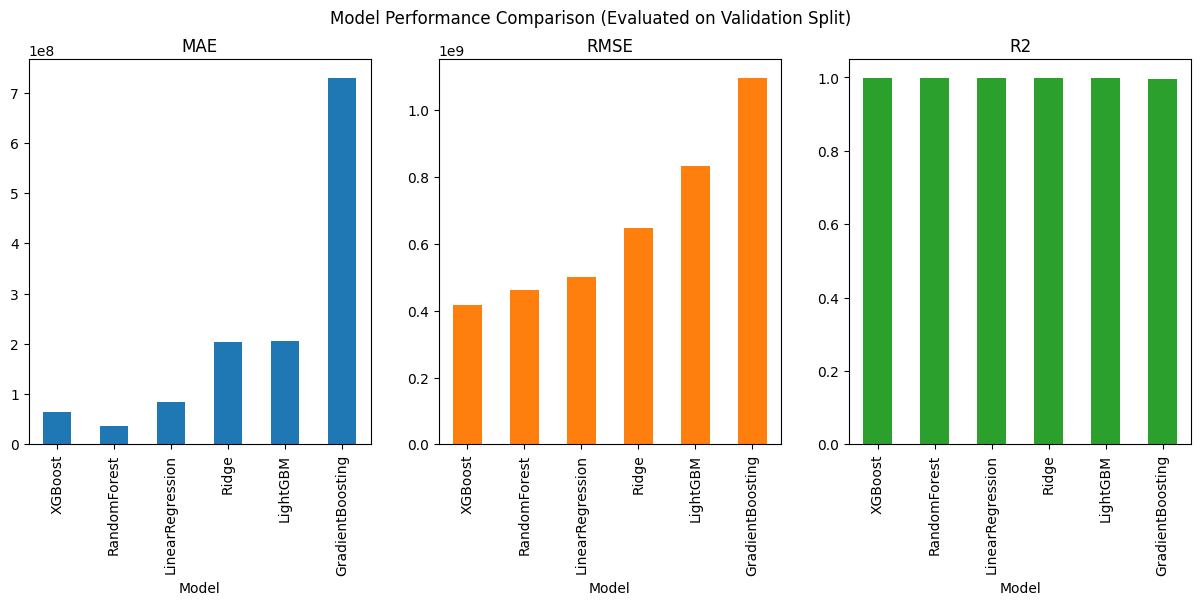

In [ ]:
# =========================================================
# End-to-End Single-Target ML Pipeline with Timing & Tuning
# Target: REVISED_ESTIMATE
# =========================================================
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os # Import os

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

# -------------------------
# Load Data - Corrected to load from file
# -------------------------
INPUT_DIR = "/content/"
try:
    train_df = pd.read_csv(os.path.join(INPUT_DIR, "train.csv"))
    test_df = pd.read_csv(os.path.join(INPUT_DIR, "test (1).csv")) # Load test data as well
    print("Data loaded successfully within cell t8puqRz7XaSs.")
    df = train_df.copy() # Use train_df for the pipeline in this cell
except FileNotFoundError:
    print("Error: Data files not found in /content/. Cannot proceed with pipeline in cell t8puqRz7XaSs.")
    df = pd.DataFrame() # Create empty DataFrame to prevent further errors
    test_df = pd.DataFrame() # Ensure test_df is also a DataFrame


# Proceed only if data was loaded
if not df.empty:

    target_col = "REVISED_ESTIMATE"
    if target_col not in df.columns:
        raise ValueError(f"Target column {target_col} not found in dataset")

    # Separate features and target
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # -------------------------
    # Identify column types
    # -------------------------
    # Need to handle potential non-numeric columns from the original df
    numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

    # -------------------------
    # Preprocessing Pipeline
    # -------------------------
    # Create preprocessing pipelines for numerical and categorical features
    # This uses Imputation and Scaling for numeric, and Imputation and One-Hot Encoding for categorical
    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ])

    # Combine preprocessing steps using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features)
        ]
    )

    # -------------------------
    # Models to compare
    # -------------------------
    models = {
        "LinearRegression": LinearRegression(),
        "Ridge": Ridge(alpha=1.0),
        "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
        "GradientBoosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
        "XGBoost": xgb.XGBRegressor(n_estimators=200, random_state=42, verbosity=0),
        "LightGBM": lgb.LGBMRegressor(n_estimators=200, random_state=42)
    }

    # -------------------------
    # Train/Test Split
    # -------------------------
    # Splitting the *training* data for evaluation purposes within this cell
    X_train, X_test_split, y_train, y_test_split = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # -------------------------
    # Training + Timing + Evaluation
    # -------------------------
    results = []

    print("\nStarting model training and evaluation...")
    for name, model in models.items():
        # Create a pipeline that first preprocesses the data and then applies the model
        pipe = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])

        start_time = time.time()
        # Train the pipeline on the training split
        pipe.fit(X_train, y_train)
        end_time = time.time()

        # Make predictions on the validation split (X_test_split)
        y_pred = pipe.predict(X_test_split)

        # Calculate Metrics on the validation split
        mae = mean_absolute_error(y_test_split, y_pred)
        # Check if y_test_split and y_pred have sufficient samples for RMSE calculation
        if len(y_test_split) > 0 and len(y_pred) > 0:
             # Calculate RMSE manually
             rmse = np.sqrt(mean_squared_error(y_test_split, y_pred))
        else:
             rmse = np.nan # Set to NaN if evaluation is not possible

        r2 = r2_score(y_test_split, y_pred)
        duration = end_time - start_time

        results.append({
            "Model": name,
            "MAE": mae,
            "RMSE": rmse,
            "R2": r2,
            "Training Time (s)": round(duration, 2)
        })

    results_df = pd.DataFrame(results).sort_values(by="RMSE")
    print("\n📊 Model Comparison:")
    print(results_df)

    # Display nicely using matplotlib
    import matplotlib.pyplot as plt

    # Ensure there are results to plot
    if not results_df.empty:
        # Filter out rows with NaN RMSE if sorting by RMSE
        plot_df = results_df.dropna(subset=['RMSE'])
        if not plot_df.empty:
            plot_df.set_index("Model")[["MAE", "RMSE", "R2"]].plot(
                kind="bar", subplots=True, layout=(1,3), figsize=(15,5), legend=False
            )
            plt.suptitle("Model Performance Comparison (Evaluated on Validation Split)")
            plt.show()
        else:
            print("\nNo valid evaluation results to plot after dropping NaNs.")
    else:
        print("\nResults DataFrame is empty. Cannot generate plots.")


else:
     print("Skipping pipeline execution: train_df could not be loaded.")